In [35]:
# XGBC first version genes
# print(X.columns[11],X.columns[28], X.columns[20])
# print(X.columns[28],X.columns[11], X.columns[19])

Hn1 Fxyd1 Cplx2
Fxyd1 Hn1 Nrxn3


In [ ]:
## polynomial fit transform
# poly_transformer = PolynomialFeatures(degree = 2)
# poly_transformer.fit(poly_features)

## Transform the features
# poly_features = poly_transformer.transform(poly_features)
# poly_features_test = poly_transformer.transform(poly_features_test)
# print('Polynomial Features shape: ', poly_features.shape)

In [1]:
from package.test.sampling_test import *
from package.model.RandomForest import model_RF
from package.preprocess.load_data import read_data,gain_data
from package.model.stacking import stacking_model
from package.util.func import *
from package.model import velo_xgb

Running scvelo 0.2.2 (python 3.7.3) on 2020-12-07 15:06.


# XGB params adjusting

In [1]:
import xgboost as xgb
from sklearn.model_selection import KFold, train_test_split
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
features = load_data.read_data(dataset="dentategyrus", use_gene_list=True)

/Users/wangxin/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Running scvelo 0.2.2 (python 3.7.3) on 2020-12-02 17:11.
<function read_data at 0x7fb09e67b400> Running time: 0.788524866104126 Seconds


In [2]:
features

ID  Slc1a3   Fam105a    Rps27l  2810459M11Rik   Golga7b    Gprc5b  \
0        0     0.0  0.619133  0.619133            0.0  0.000000  0.619133   
1        1     0.0  0.000000  0.712705            0.0  0.000000  0.000000   
2        2     0.0  0.000000  0.920456            0.0  0.000000  0.000000   
3        3     0.0  0.000000  0.000000            0.0  0.460583  0.000000   
4        4     0.0  0.000000  0.000000            0.0  0.000000  0.000000   
...    ...     ...       ...       ...            ...       ...       ...   
2925  2925     0.0  0.000000  0.555424            0.0  0.000000  0.000000   
2926  2926     0.0  0.000000  0.937405            0.0  0.000000  0.000000   
2927  2927     0.0  0.000000  0.000000            0.0  0.000000  0.000000   
2928  2928     0.0  0.000000  0.000000            0.0  0.000000  0.000000   
2929  2929     0.0  0.000000  0.000000            0.0  0.000000  0.541146   

         Lsamp        Qk       Tnr  ...     Fxyd1    Pgm2l1    Tmeff2  \
0     0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
1     0.712705  0.000000  0.000000  ...  0.712705  0.000000  0.712705   
2     0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3     0.460583  0.460583  0.000000  ...  0.000000  0.000000  0.460583   
4     0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.616411   
...        ...       ...       ...  ...       ...       ...       ...   
2925  0.000000  0.000000  0.000000  ...  0.000000  0.555424  0.000000   
2926  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
2927  0.796909  0.000000  0.796909  ...  0.000000  0.000000  0.796909   
2928  0.000000  1.184739  0.000000  ...  0.000000  0.000000  0.000000   
2929  0.890337  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

         Fabp5  Efcab14     Gpm6b    Hmgcs1  Sphkap  Mapk6  target  
0     0.619133      0.0  0.000000  0.000000     0.0    0.0     3.0  
1     0.000000      0.0  0.000000  1.124606     0.0    0.0     3.0  
2     0.000000      0.0  0.000000  0.920456     0.0    0.0     2.0  
3     0.000000      0.0  0.000000  0.460583     0.0    0.0     1.0  
4     0.000000      0.0  0.616411  0.000000     0.0    0.0     3.0  
...        ...      ...       ...       ...     ...    ...     ...  
2925  0.000000      0.0  0.555424  0.000000     0.0    0.0     2.0  
2926  3.124426      0.0  0.000000  0.937405     0.0    0.0     1.0  
2927  0.000000      0.0  0.000000  0.000000     0.0    0.0     3.0  
2928  0.000000      0.0  0.000000  0.000000     0.0    0.0     1.0  
2929  0.541146      0.0  0.541146  0.000000     0.0    0.0     0.0  

[2930 rows x 119 columns]

In [9]:
from imblearn.combine import SMOTETomek

labels = features['target']
features = features.drop(columns=['target'])

print("Raw target type ratio:")
print(pd.DataFrame(labels)['target'].value_counts())

sample_solver = SMOTETomek()
features, labels = sample_solver.fit_sample(features, labels)
print("After imbalance processing type ratio:")
print(pd.DataFrame(labels)['target'].value_counts())

X_train, X_test, y_train, y_test = train_test_split(features, labels, stratify=labels, test_size=0.3,random_state=326)

# Extract the ids
test_ids = X_test['ID']

# Remove the ids and target
X_train = X_train.drop(columns=['ID'])
X_test = X_test.drop(columns=['ID'])
# Extract feature names
feature_names = list(X_train.columns)

print('Training Data Shape: ', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

# Convert to np arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
    
# Create the kfold object
k_fold = KFold(n_splits=5, shuffle=True, random_state=50)

Raw target type ratio:
3    1279
1     751
2     611
0     289
Name: target, dtype: int64
After imbalance processing type ratio:
0    1195
1    1189
2    1153
3    1109
Name: target, dtype: int64
Training Data Shape:  (3252, 52)
Testing Data Shape:  (1394, 52)


In [492]:
other_params = {'booster': 'gbtree',
            'scale_pos_weight':1,
            'max_depth':10,
            'learning_rate':0.01,
            'n_estimators':500,
            'objective':'multi:softmax',
            'n_jobs':-1,
            'gamma':0,
            'min_child_weight':1,
            'max_delta_step':0,
            'subsample':0.85,
            'colsample_bytree':0.7,
            'reg_alpha':0,
            'reg_lambda':1,
            'seed':1440,
            'missing':None,
            'num_class':4}

cv_params ={'n_estimators': [1600, 1700, 1750, 1800]}

model = xgb.XGBClassifier(**other_params)

optimized_XGB = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=k_fold, verbose=1, n_jobs=-1)
optimized_XGB.fit(X_train, y_train)
print('每轮迭代运行结果:{0}'.format(optimized_XGB.cv_results_['mean_test_score']))
print('参数的最佳取值:{0}'.format(optimized_XGB.best_params_))
print('最佳模型得分:{0}'.format(optimized_XGB.best_score_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  7.3min finished


[23:54:50] WARNING: /Users/wangxin/xgboost/python-package/build/temp.macosx-10.7-x86_64-3.7/xgboost/src/learner.cc:485: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


每轮迭代运行结果:[0.73071535 0.7310221  0.7307144  0.73009996]
参数的最佳取值:{'n_estimators': 1700}
最佳模型得分:0.7310220961833865


In [494]:
cv_params = {'max_depth': [10,11,12,13], 'min_child_weight': [ 1,2,3,4]}
other_params = {'booster': 'gbtree',
            'scale_pos_weight':1,
            'max_depth':10,
            'learning_rate':0.01,
            'n_estimators':1700,
            'objective':'multi:softmax',
            'n_jobs':-1,
            'gamma':0,
            'min_child_weight':1,
            'max_delta_step':0,
            'subsample':0.85,
            'colsample_bytree':0.7,
            'reg_alpha':0,
            'reg_lambda':1,
            'seed':1440,
            'missing':None,
            'num_class':4}

model = xgb.XGBClassifier(**other_params)
optimized_XGB = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=k_fold, verbose=1, n_jobs=-1)
optimized_XGB.fit(X_train, y_train)
print('每轮迭代运行结果:{0}'.format(optimized_XGB.cv_results_['mean_test_score']))
print('参数的最佳取值：{0}'.format(optimized_XGB.best_params_))
print('最佳模型得分:{0}'.format(optimized_XGB.best_score_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 26.8min finished


[10:05:31] WARNING: /Users/wangxin/xgboost/python-package/build/temp.macosx-10.7-x86_64-3.7/xgboost/src/learner.cc:485: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


每轮迭代运行结果:[0.7310221  0.72702966 0.72426043 0.72364693 0.73102304 0.72456954
 0.72334113 0.7227248  0.73040907 0.72456907 0.7264138  0.72211225
 0.72979511 0.72949072 0.72579936 0.72426137]
参数的最佳取值：{'max_depth': 11, 'min_child_weight': 1}
最佳模型得分:0.7310230414746544


In [495]:
cv_params = {'gamma': [0, 0.01, 0.03, 0.05, 0.07, 0.1]}
other_params = {'booster': 'gbtree',
            'n_estimators':1700,
            'min_child_weight':1,
            'max_depth':11,
            'learning_rate':0.01,
            'scale_pos_weight':1,
            'objective':'multi:softmax',
            'n_jobs':-1,
            'gamma':0, 
            'max_delta_step':0,
            'subsample':0.85,
            'colsample_bytree':0.7,
            'reg_alpha':0,
            'reg_lambda':1,
            'seed':1440,
            'missing':None,
            'num_class':4}

model = xgb.XGBClassifier(**other_params)
optimized_XGB = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=k_fold, verbose=1, n_jobs=-1)
optimized_XGB.fit(X_train, y_train)
print('每轮迭代运行结果:{0}'.format(optimized_XGB.cv_results_['mean_test_score']))
print('参数的最佳取值：{0}'.format(optimized_XGB.best_params_))
print('最佳模型得分:{0}'.format(optimized_XGB.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 10.7min finished


[10:27:59] WARNING: /Users/wangxin/xgboost/python-package/build/temp.macosx-10.7-x86_64-3.7/xgboost/src/learner.cc:485: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


每轮迭代运行结果:[0.73102304 0.73133026 0.73255914 0.72917972 0.73071629 0.72979416]
参数的最佳取值：{'gamma': 0.03}
最佳模型得分:0.7325591397849461


In [496]:
cv_params = {'subsample': [0.4, 0.5, 0.6, 0.7, 0.8], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]}
other_params = {'booster': 'gbtree',
            'n_estimators':1700,
            'min_child_weight':1,
            'max_depth':11,
            'gamma':0.03, 
            'subsample':0.85,
            'colsample_bytree':0.7,
            'learning_rate':0.01,
            'scale_pos_weight':1,
            'objective':'multi:softmax',
            'n_jobs':-1,
            'max_delta_step':0,
            'reg_alpha':0,
            'reg_lambda':1,
            'seed':1440,
            'missing':None,
            'num_class':4}

model = xgb.XGBClassifier(**other_params)
optimized_XGB = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=k_fold, verbose=1, n_jobs=-1)
optimized_XGB.fit(X_train, y_train)
print('每轮迭代运行结果:{0}'.format(optimized_XGB.cv_results_['mean_test_score']))
print('参数的最佳取值：{0}'.format(optimized_XGB.best_params_))
print('最佳模型得分:{0}'.format(optimized_XGB.best_score_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 32.9min finished


[11:03:33] WARNING: /Users/wangxin/xgboost/python-package/build/temp.macosx-10.7-x86_64-3.7/xgboost/src/learner.cc:485: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


每轮迭代运行结果:[0.72887156 0.73132884 0.73348222 0.7288725  0.72979416 0.73133121
 0.73041144 0.73317594 0.73133215 0.73041002 0.7307144  0.73348269
 0.73164221 0.73256528 0.73040671 0.73225334 0.73041144 0.73164173
 0.7325615  0.73255961]
参数的最佳取值：{'colsample_bytree': 0.8, 'subsample': 0.5}
最佳模型得分:0.733482689353657


In [12]:
cv_params = {'reg_alpha': [1,2,3,4], 'reg_lambda': [1,2,3,4]}
other_params = {'booster': 'gbtree',
            'n_estimators':1700,
            'min_child_weight':1,
            'max_depth':11,
            'gamma':0.03, 
            'subsample':0.5,
            'colsample_bytree':0.8,
            'reg_alpha':0,
            'reg_lambda':1,
            'learning_rate':0.01,
            'objective':'multi:softmax',
            'n_jobs':-1,
            'max_delta_step':0,
            'seed':1440,
            'missing':None,
            'num_class':4}

model = xgb.XGBClassifier(**other_params)
optimized_XGB = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=k_fold, verbose=1, n_jobs=-1)
optimized_XGB.fit(X_train, y_train)
print('每轮迭代运行结果:{0}'.format(optimized_XGB.cv_results_['mean_test_score']))
print('参数的最佳取值：{0}'.format(optimized_XGB.best_params_))
print('最佳模型得分:{0}'.format(optimized_XGB.best_score_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 26.4min finished


每轮迭代运行结果:[0.74169443 0.74077278 0.73738816 0.73677325 0.73369916 0.73308425
 0.73154531 0.73154579 0.73031596 0.7293943  0.73246981 0.72724046
 0.72662602 0.72447076 0.72416401 0.72324093]
参数的最佳取值：{'reg_alpha': 1, 'reg_lambda': 1}
最佳模型得分:0.7416944345976604


In [13]:
cv_params = {'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1]}
other_params = {'booster': 'gbtree',
            'n_estimators':1700,
            'min_child_weight':1,
            'max_depth':11,
            'gamma':0.03, 
            'subsample':0.5,
            'colsample_bytree':0.8,
            'reg_alpha':1,
            'reg_lambda':1,
            'learning_rate':0.03,
            'objective':'multi:softmax',
            'n_jobs':-1,
            'max_delta_step':0,
            'seed':1440,
            'missing':None,
            'num_class':4}

model = xgb.XGBClassifier(**other_params)
optimized_XGB = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=k_fold, verbose=1, n_jobs=-1)
optimized_XGB.fit(X_train, y_train)
print('每轮迭代运行结果:{0}'.format(optimized_XGB.cv_results_['mean_test_score']))
print('参数的最佳取值：{0}'.format(optimized_XGB.best_params_))
print('最佳模型得分:{0}'.format(optimized_XGB.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  7.3min finished


每轮迭代运行结果:[0.74169443 0.74169585 0.74046556 0.73400922 0.73769633]
参数的最佳取值：{'learning_rate': 0.03}
最佳模型得分:0.7416958525345623


In [4]:
## RAW testing denoising

In [59]:
pd.read_csv("./DG_raw.csv")

Unnamed: 0    0    1    2    3    4    5    6    7    8  ...  2920  \
0               0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
1               1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
2               2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   2.0   
3               3  2.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  ...   1.0   
4               4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
13908       13908  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
13909       13909  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
13910       13910  0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  ...   0.0   
13911       13911  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
13912       13912  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   

       2921  2922  2923  2924  2925  2926  2927  2928  2929  
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2       0.0   0.0   0.0   0.0   2.0   0.0   0.0   0.0   0.0  
3       1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
13908   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
13909   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  
13910   0.0   2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
13911   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
13912   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0  

[13913 rows x 2931 columns]

In [49]:
pd.read_csv("./lamanno_downsampled.csv")

Unnamed: 0  1772096_095_C09  1772121_291_D10  1772122_201_E04  \
0        'MARC1'                0                0                0   
1        'MARC2'                0                0                0   
2       'MARCH1'                0                0                0   
3      'MARCH10'                0                0                0   
4       'MARCH2'                0                0                0   
...          ...              ...              ...              ...   
20555     ZYG11A                0                0                0   
20556     ZYG11B                0                0                0   
20557        ZYX                0                0                0   
20558      ZZEF1                0                0                0   
20559       ZZZ3                0                0                0   

       1772122_226_A12  1772078_001_H05  1772122_220_G10  1772122_223_C09  \
0                    0                0                0                0   
1                    0                0                0                0   
2                    0                0                0                0   
3                    0                0                0                0   
4                    0                0                0                0   
...                ...              ...              ...              ...   
20555                0                0                0                0   
20556                0                0                0                0   
20557                0                0                1                0   
20558                0                0                0                0   
20559                0                0                0                0   

       1772122_203_F08  1772122_199_C05  ...  1772122_200_E06  \
0                    0                0  ...                0   
1                    0                0  ...                0   
2                    0                0  ...                0   
3                    0                0  ...                0   
4                    0                0  ...                0   
...                ...              ...  ...              ...   
20555                0                0  ...                0   
20556                0                0  ...                0   
20557                0                1  ...                0   
20558                0                0  ...                0   
20559                0                0  ...                1   

       1772078_002_E07  1772122_236_F02  1772122_207_G01  1772122_264_C10  \
0                    0                0                0                0   
1                    0                0                0                0   
2                    0                0                0                0   
3                    0                0                0                0   
4                    0                0                0                0   
...                ...              ...              ...              ...   
20555                0                0                0                0   
20556                0                0                1                0   
20557                0                0                1                0   
20558                0                0                0                0   
20559                0                0                0                0   

       1772121_291_G08  1772122_236_G05  1772122_223_C10  1772122_220_A09  \
0                    0                0                0                0   
1                    0                0                0                0   
2                    0                0                0                0   
3                    0                0                0                0   
4                    0                0                0                0   
...                ...              ...              ...    

In [41]:
pd.read_csv("./DG_denoised.csv")

X0     X1     X2     X3     X4     X5     X6     X7     X8     X9  \
0      0.002  0.005  0.003  0.001  0.003  0.001  0.002  0.001  0.018  0.002   
1      0.139  0.675  0.140  0.043  0.152  0.053  0.121  0.049  0.049  0.144   
2      0.086  0.069  0.153  0.106  0.084  0.155  0.084  0.098  0.072  0.104   
3      0.592  0.201  0.265  0.183  0.248  0.251  0.451  0.222  0.087  0.347   
4      0.018  0.004  0.033  0.018  0.014  0.006  0.034  0.025  0.005  0.024   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
13908  0.024  0.006  0.033  0.001  0.035  0.001  0.049  0.001  0.008  0.079   
13909  0.155  0.061  0.103  0.004  0.122  0.003  0.151  0.006  0.133  0.198   
13910  0.259  0.131  0.163  0.283  0.319  0.410  0.287  0.275  0.170  0.336   
13911  0.012  0.001  0.008  0.001  0.009  0.001  0.009  0.001  0.001  0.007   
13912  0.102  0.041  0.052  0.002  0.164  0.001  0.099  0.003  0.052  0.159   

       ...  X2920  X2921  X2922  X2923  X2924  X2925  X2926  X2927  X2928  \
0      ...  0.001  0.004  0.006  0.004  0.019  0.001  0.002  0.003  0.019   
1      ...  0.092  0.065  0.089  0.166  0.141  0.115  0.064  0.083  0.061   
2      ...  0.334  0.138  0.091  0.118  0.096  0.211  0.146  0.082  0.081   
3      ...  0.206  0.410  0.330  0.441  0.225  0.230  0.174  0.303  0.096   
4      ...  0.007  0.064  0.053  0.027  0.002  0.024  0.005  0.033  0.010   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
13908  ...  0.001  0.036  0.067  0.044  0.002  0.005  0.001  0.034  0.013   
13909  ...  0.007  0.156  0.309  0.156  0.044  0.018  0.006  0.165  0.158   
13910  ...  0.142  0.184  0.536  0.309  0.262  0.228  0.281  0.266  0.162   
13911  ...  0.001  0.016  0.019  0.014  0.002  0.003  0.001  0.013  0.001   
13912  ...  0.004  0.106  0.286  0.184  0.025  0.012  0.005  0.187  0.075   

       X2929  
0      0.004  
1      0.125  
2      0.112  
3      0.311  
4      0.033  
...      ...  
13908  0.038  
13909  0.395  
13910  0.321  
13911  0.020  
13912  0.229  

[13913 rows x 2930 columns]

In [17]:
print(X.columns[11],X.columns[28], X.columns[20])
print(X.columns[28],X.columns[11], X.columns[19])

Hn1 Fxyd1 Cplx2
Fxyd1 Hn1 Nrxn3


In [18]:
print(X.columns[21],X.columns[20], X.columns[44])
print(X.columns[20],X.columns[21], X.columns[37])

Nfix Cplx2 Nfib
Cplx2 Nfix Pnp


# Preprocessing

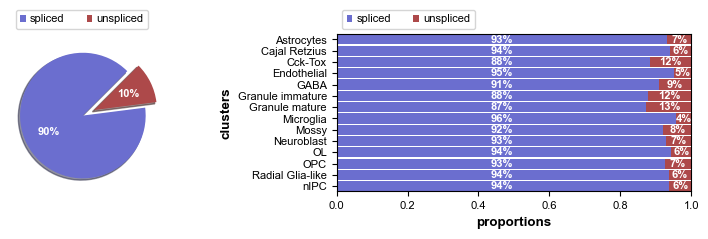

Filtered out 11019 genes that are detected 30 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


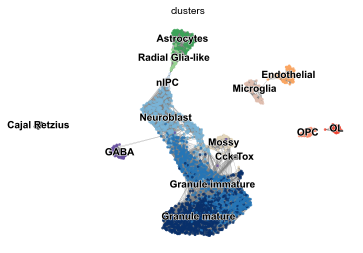

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


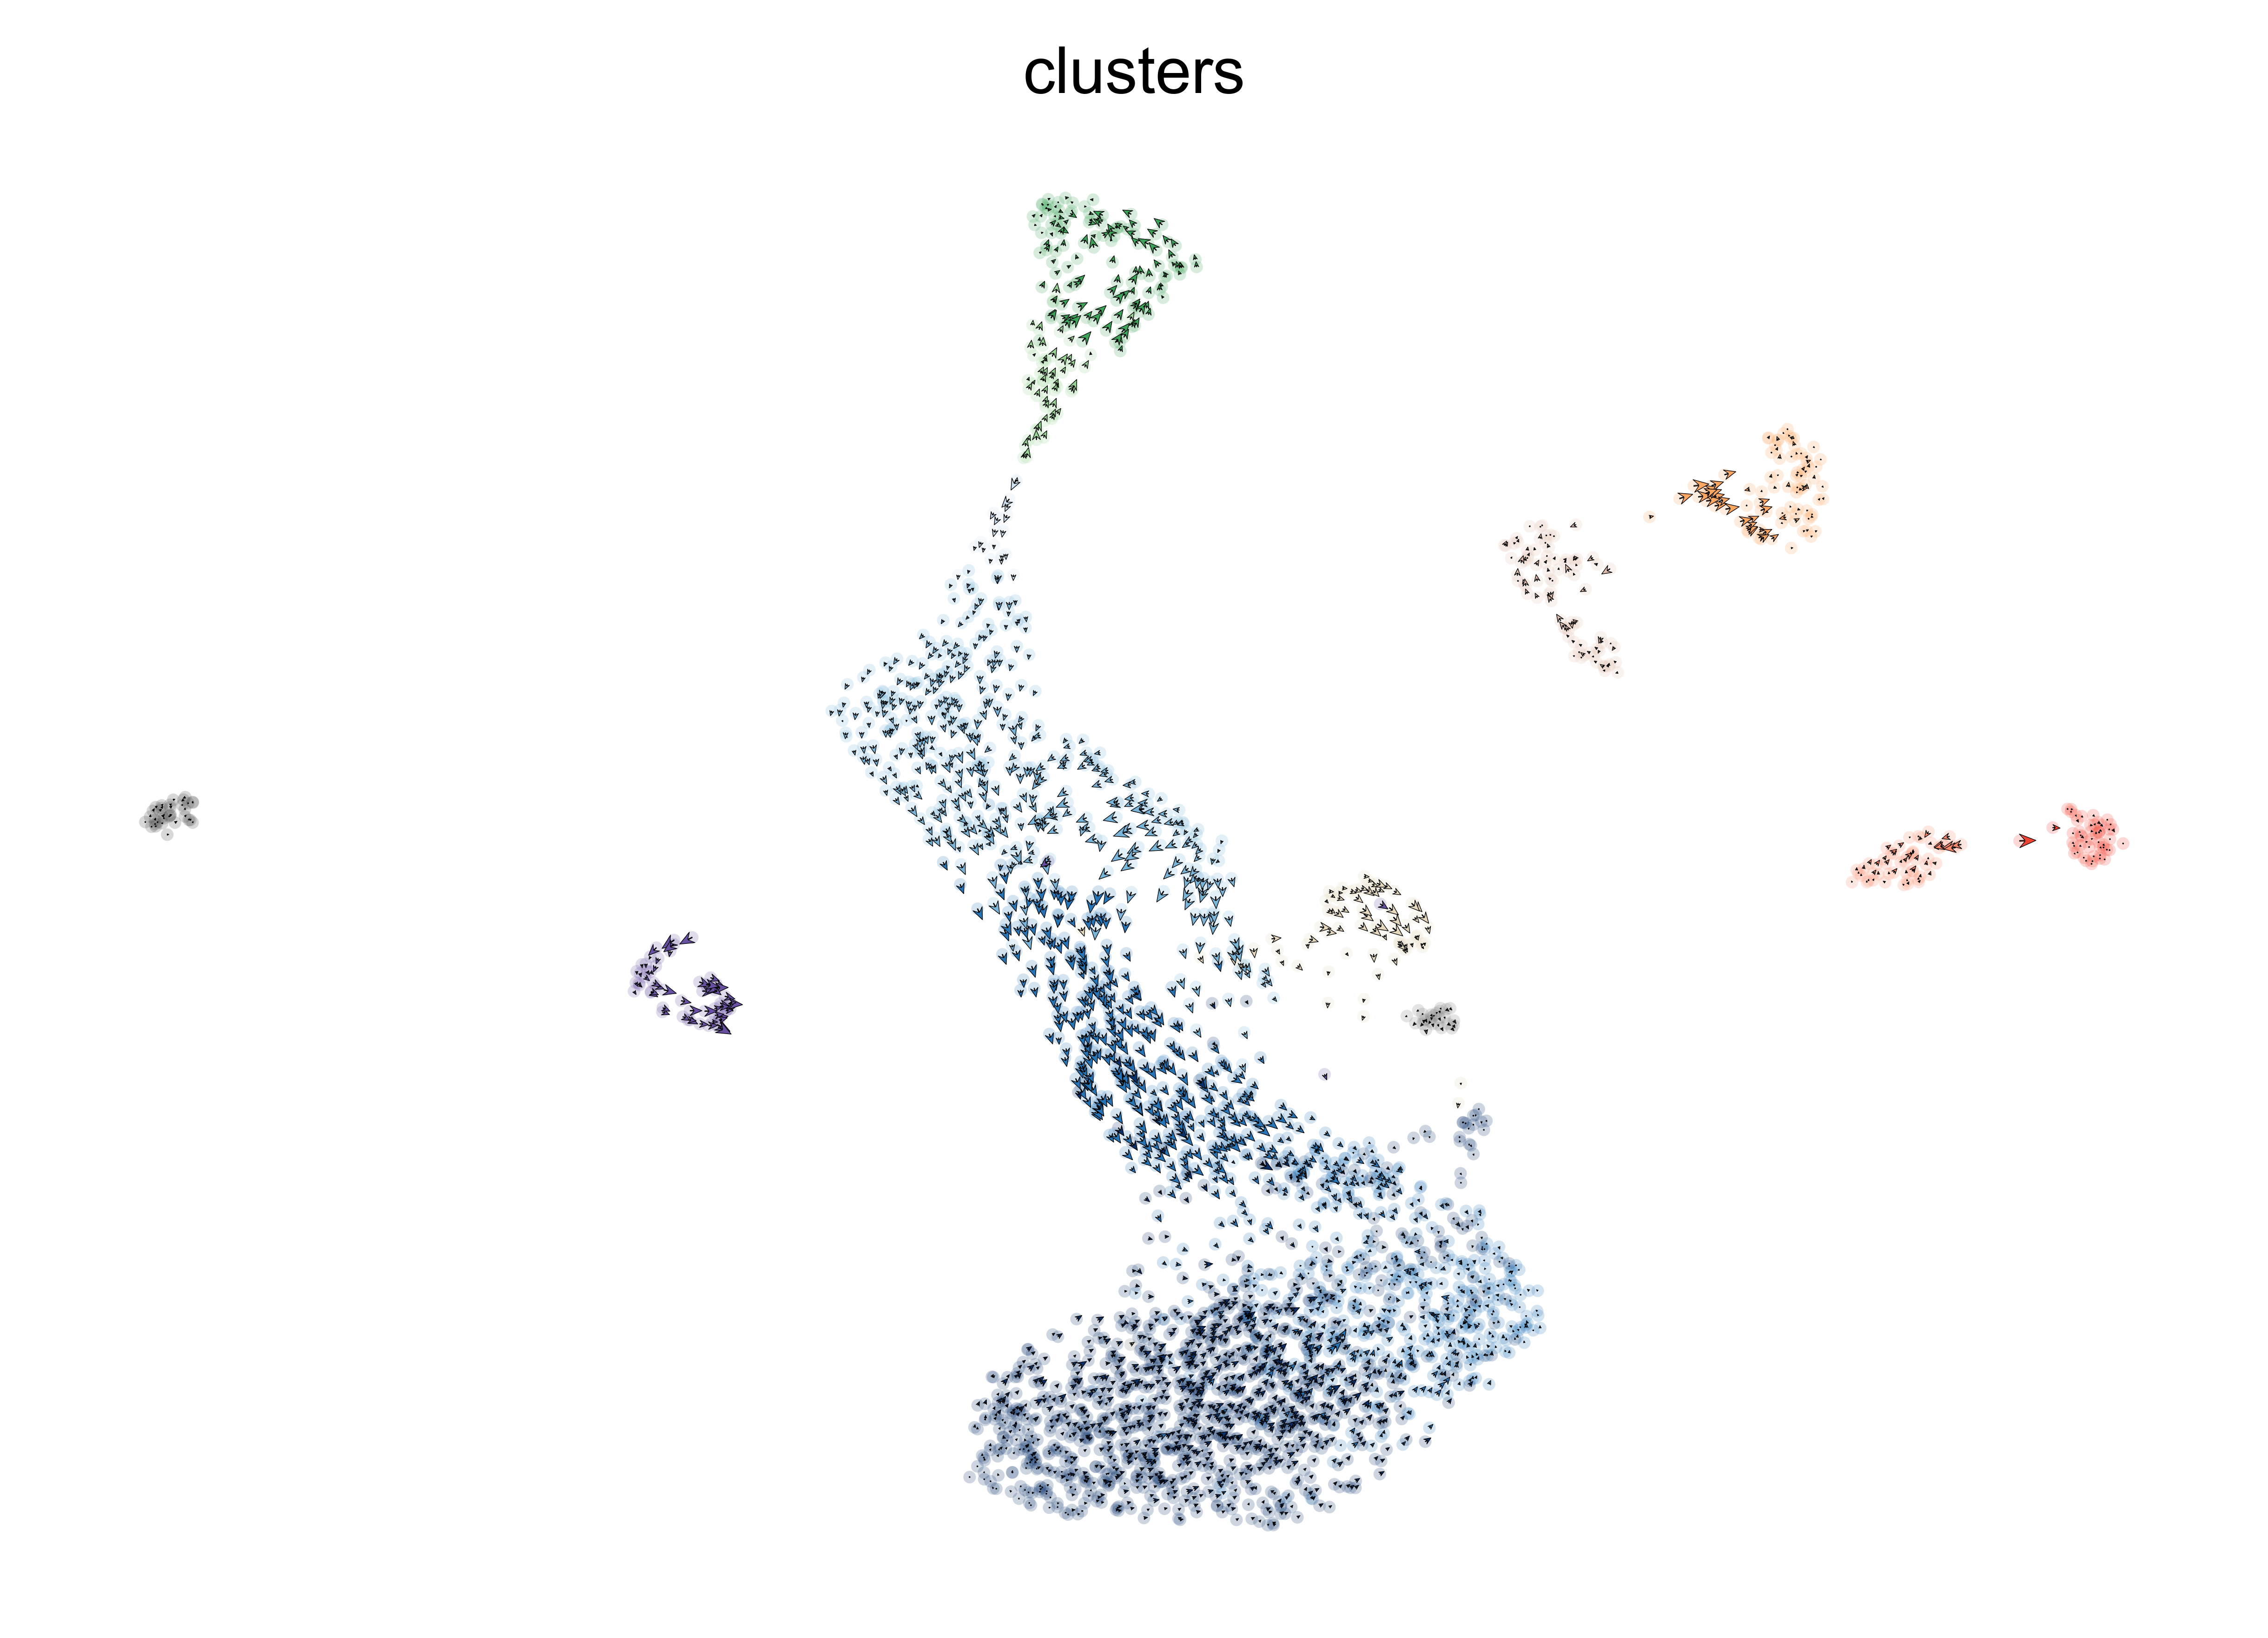

<function gain_data at 0x7f9b04c7ad90> Running time: 25.913206100463867 Seconds
ranking velocity genes
    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)
<function read_data at 0x7f9b04c7af28> Running time: 0.9589841365814209 Seconds


ID    Shisa9  2010300C02Rik  Serpine2     Fxyd1  Srgap2  Luzp2  \
0        0  0.619133       0.000000       0.0  0.000000     0.0    0.0   
1        1  0.000000       0.000000       0.0  0.712705     0.0    0.0   
2        2  0.000000       0.920456       0.0  0.000000     0.0    0.0   
3        3  0.000000       0.774725       0.0  0.000000     0.0    0.0   
4        4  0.000000       0.000000       0.0  0.000000     0.0    0.0   
...    ...       ...            ...       ...       ...     ...    ...   
2925  2925  0.000000       0.910418       0.0  0.000000     0.0    0.0   
2926  2926  0.000000       0.000000       0.0  0.000000     0.0    0.0   
2927  2927  0.000000       0.000000       0.0  0.000000     0.0    0.0   
2928  2928  0.000000       0.000000       0.0  0.000000     0.0    0.0   
2929  2929  0.000000       1.523853       0.0  0.000000     0.0    0.0   

      Arhgap31   Golga7b   Tmem47  ...    Arrdc3  Phkg1      Scg3    Lancl1  \
0          0.0  0.000000  0.00000  ...  0.000000    0.0  0.000000  0.619133   
1          0.0  0.000000  1.41549  ...  0.712705    0.0  0.712705  0.000000   
2          0.0  0.000000  0.00000  ...  0.000000    0.0  0.000000  0.000000   
3          0.0  0.460583  0.00000  ...  0.000000    0.0  0.000000  0.000000   
4          0.0  0.000000  0.00000  ...  0.000000    0.0  0.000000  0.000000   
...        ...       ...      ...  ...       ...    ...       ...       ...   
2925       0.0  0.000000  0.00000  ...  0.555424    0.0  0.555424  0.555424   
2926       0.0  0.000000  0.00000  ...  0.000000    0.0  0.000000  0.000000   
2927       0.0  0.000000  0.00000  ...  0.000000    0.0  0.000000  0.000000   
2928       0.0  0.000000  0.00000  ...  0.000000    0.0  0.000000  0.000000   
2929       0.0  0.000000  0.00000  ...  0.000000    0.0  0.000000  0.541146   

          Bzw2    Pgm2l1    Rps27l     Stmn2      Clmn  target  
0     0.000000  0.000000  0.619133  0.000000  0.000000     0.0  
1     0.000000  0.000000  0.712705  0.000000  0.712705     0.0  
2     0.920456  0.000000  0.920456  0.000000  0.000000     0.0  
3     0.000000  0.000000  0.000000  2.006195  0.000000     1.0  
4     0.000000  0.000000  0.000000  0.000000  0.000000     0.0  
...        ...       ...       ...       ...       ...     ...  
2925  0.555424  0.555424  0.555424  0.000000  0.000000     1.0  
2926  0.000000  0.000000  0.937405  1.412618  0.000000     1.0  
2927  0.000000  0.000000  0.000000  0.000000  0.000000     0.0  
2928  0.000000  0.000000  0.000000  0.000000  0.000000     1.0  
2929  0.890337  0.000000  0.000000  0.000000  0.541146     3.0  

[2930 rows x 43 columns]

In [6]:
# dataset="pancreas"
# dataset="forebrain"
adata = gain_data(dataset="dentategyrus")
get_gene_list(adata, dataset="dentategyrus", top_k=3)
X = read_data(dataset="dentategyrus", num_class=4, use_gene_list=True)
X

(2930, 43)


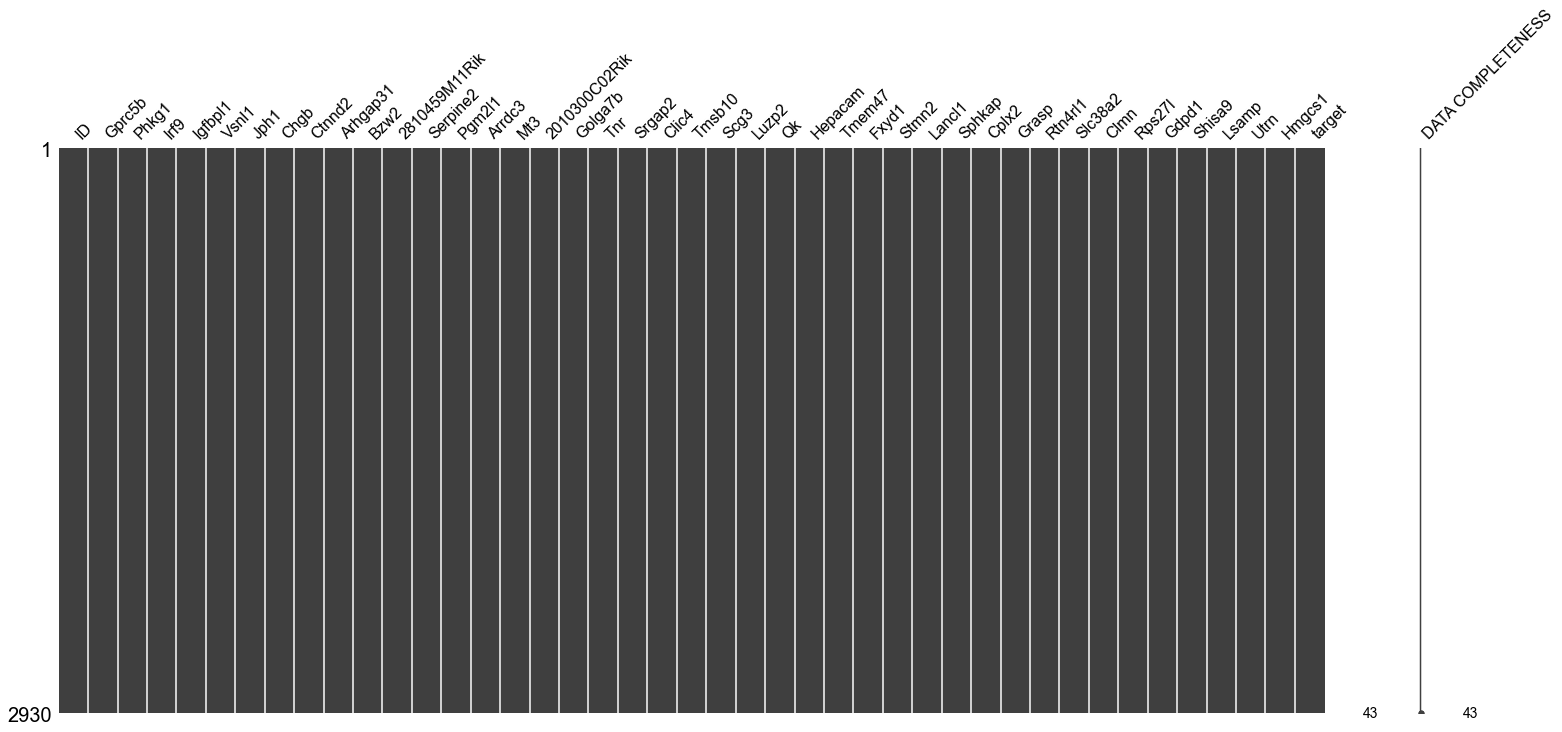

In [7]:
# outlier detection
import missingno as msno
print(X.shape)
msno.matrix(X,labels=True)
# msno.bar(X) 
# msno.heatmap(X) 
# msno.dendrogram(X)

## Sampling methods

Raw target type ratio:


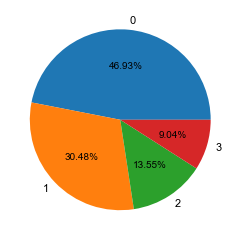

 balance score is  0.5375168994202522
              precision    recall  f1-score   support

           0       0.70      0.94      0.80       412
           1       0.76      0.55      0.64       268
           2       0.60      0.52      0.56       119
           3       0.44      0.14      0.21        80

    accuracy                           0.69       879
   macro avg       0.62      0.54      0.55       879
weighted avg       0.68      0.69      0.66       879



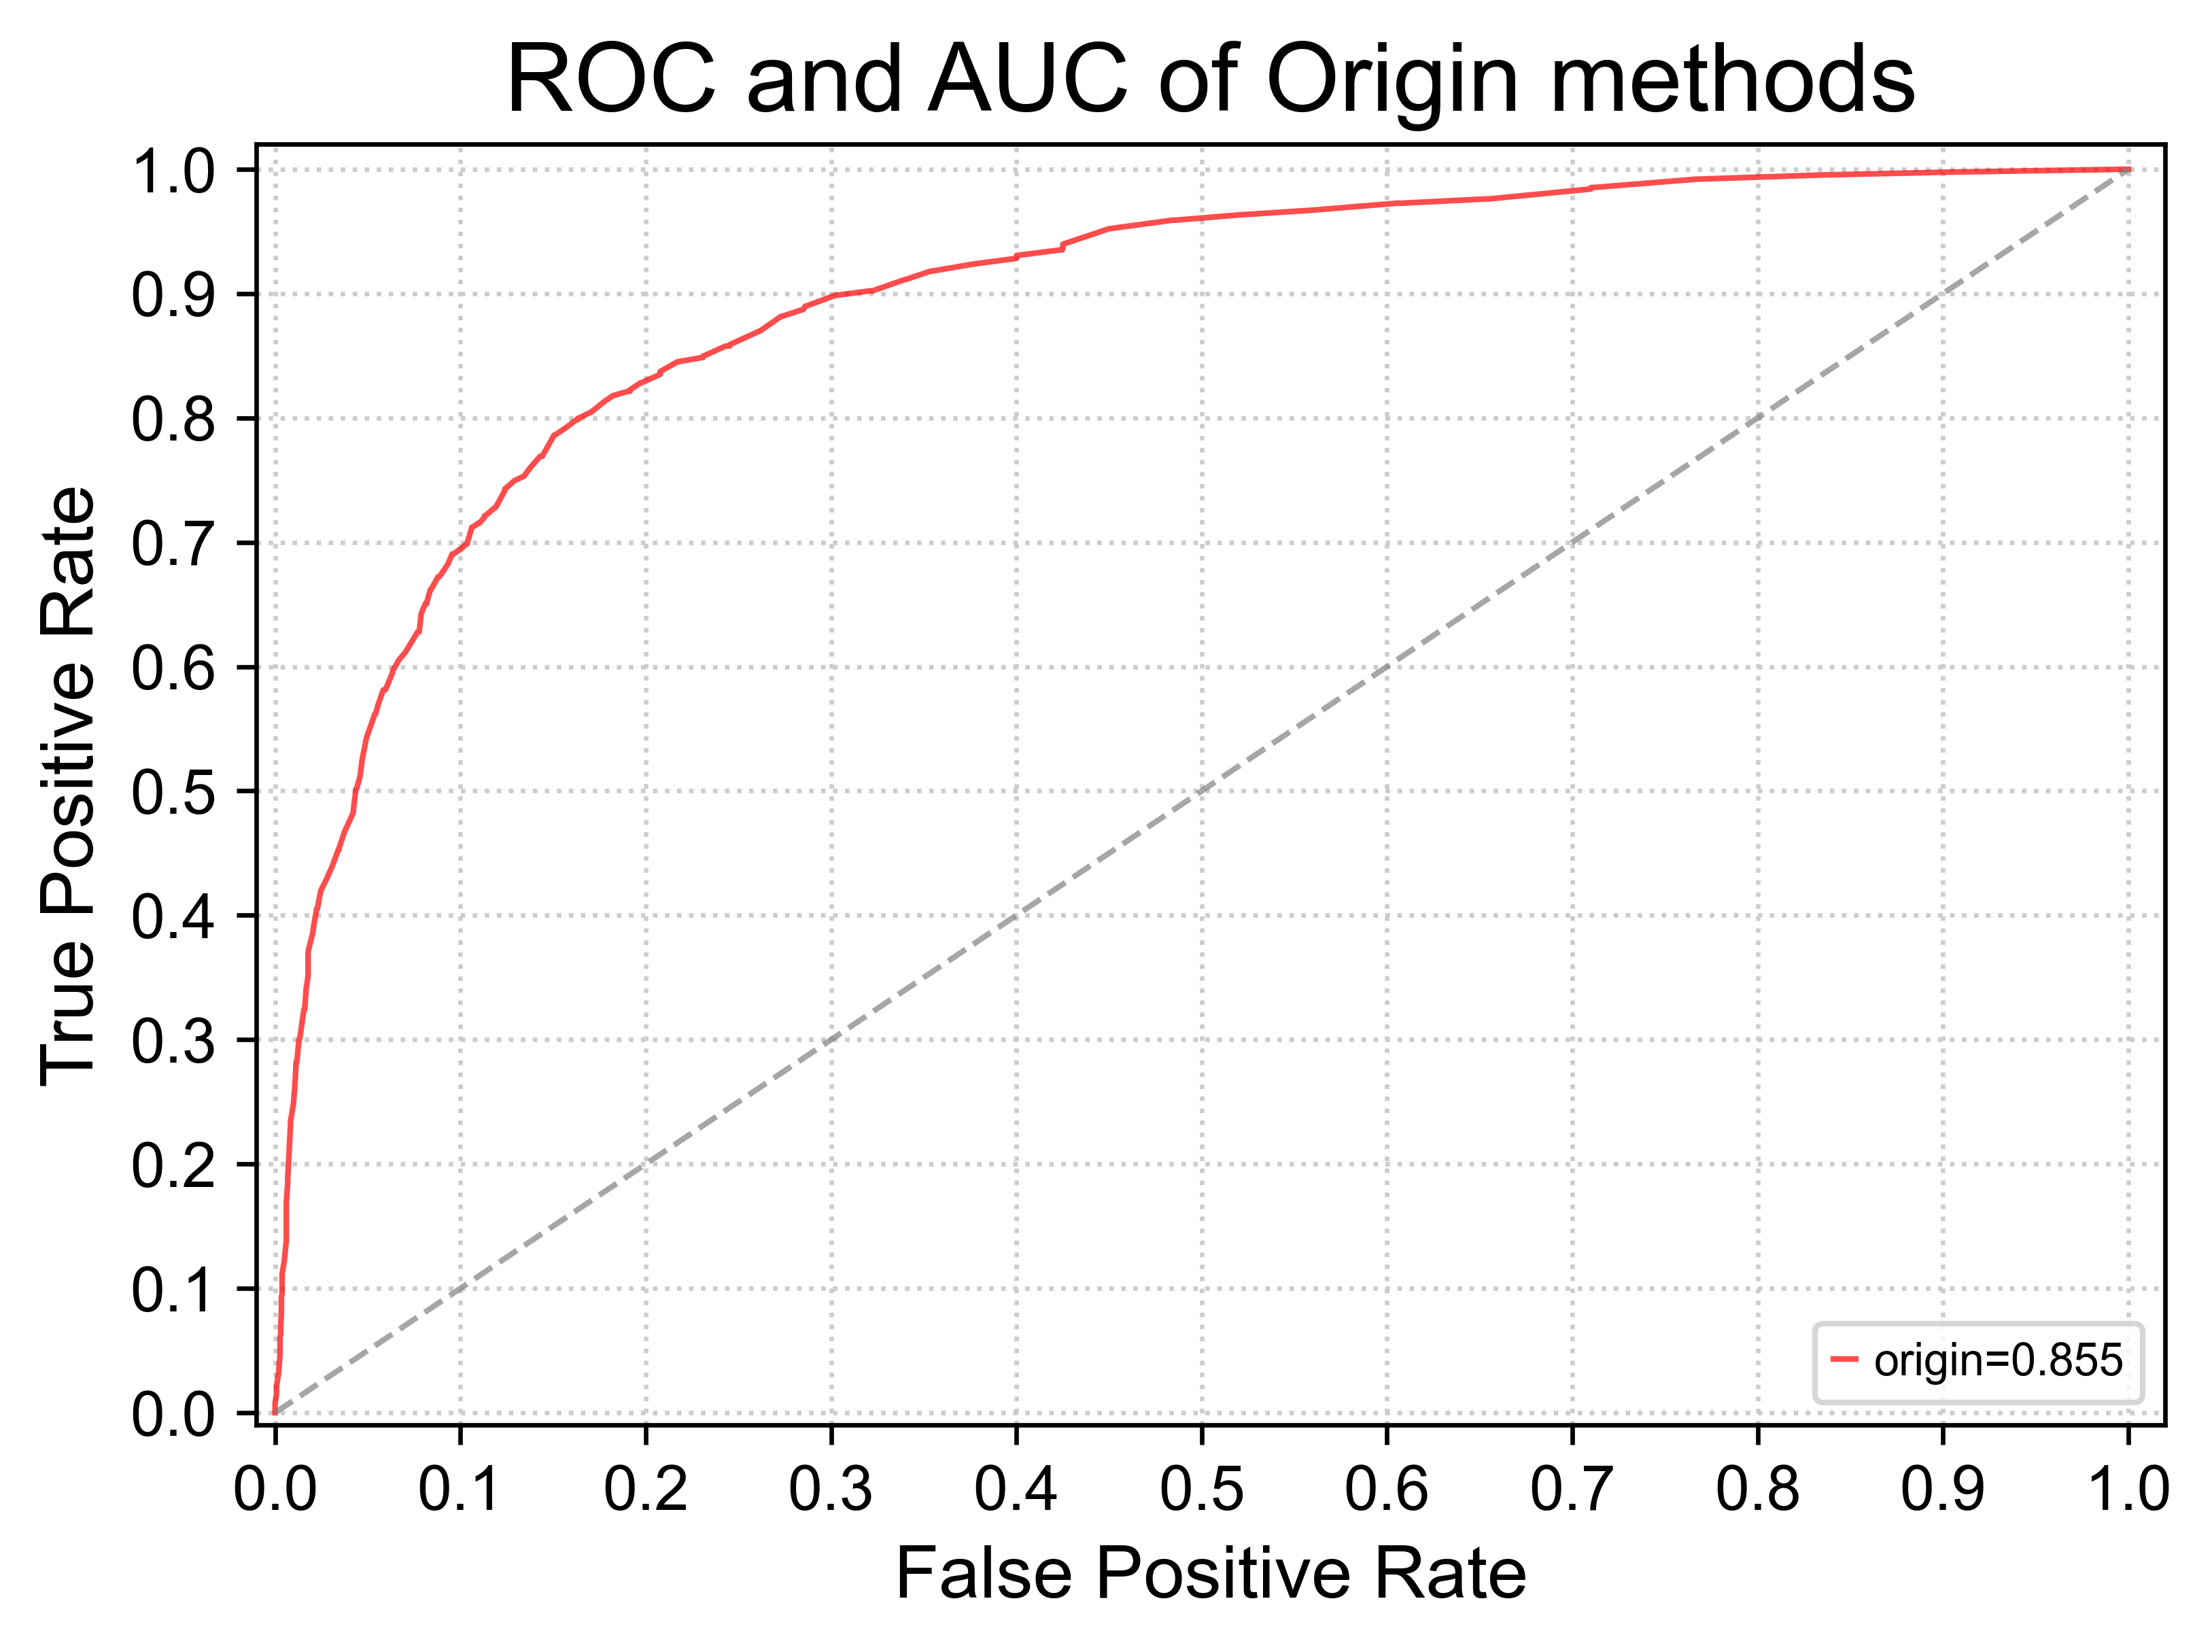

In [3]:
origin(X,4)

Raw target type ratio:


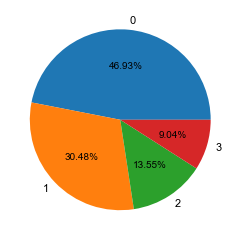

SMOTE balance score is  0.78778297562237
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       413
           1       0.83      0.61      0.70       412
           2       0.80      0.81      0.81       412
           3       0.83      0.85      0.84       413

    accuracy                           0.79      1650
   macro avg       0.79      0.79      0.78      1650
weighted avg       0.79      0.79      0.78      1650

ADASYN balance score is  0.7872985750092203
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       412
           1       0.82      0.60      0.69       407
           2       0.81      0.80      0.80       415
           3       0.81      0.87      0.84       434

    accuracy                           0.79      1668
   macro avg       0.79      0.79      0.78      1668
weighted avg       0.79      0.79      0.79      1668

BLS balance score is  0.794456263663932
     

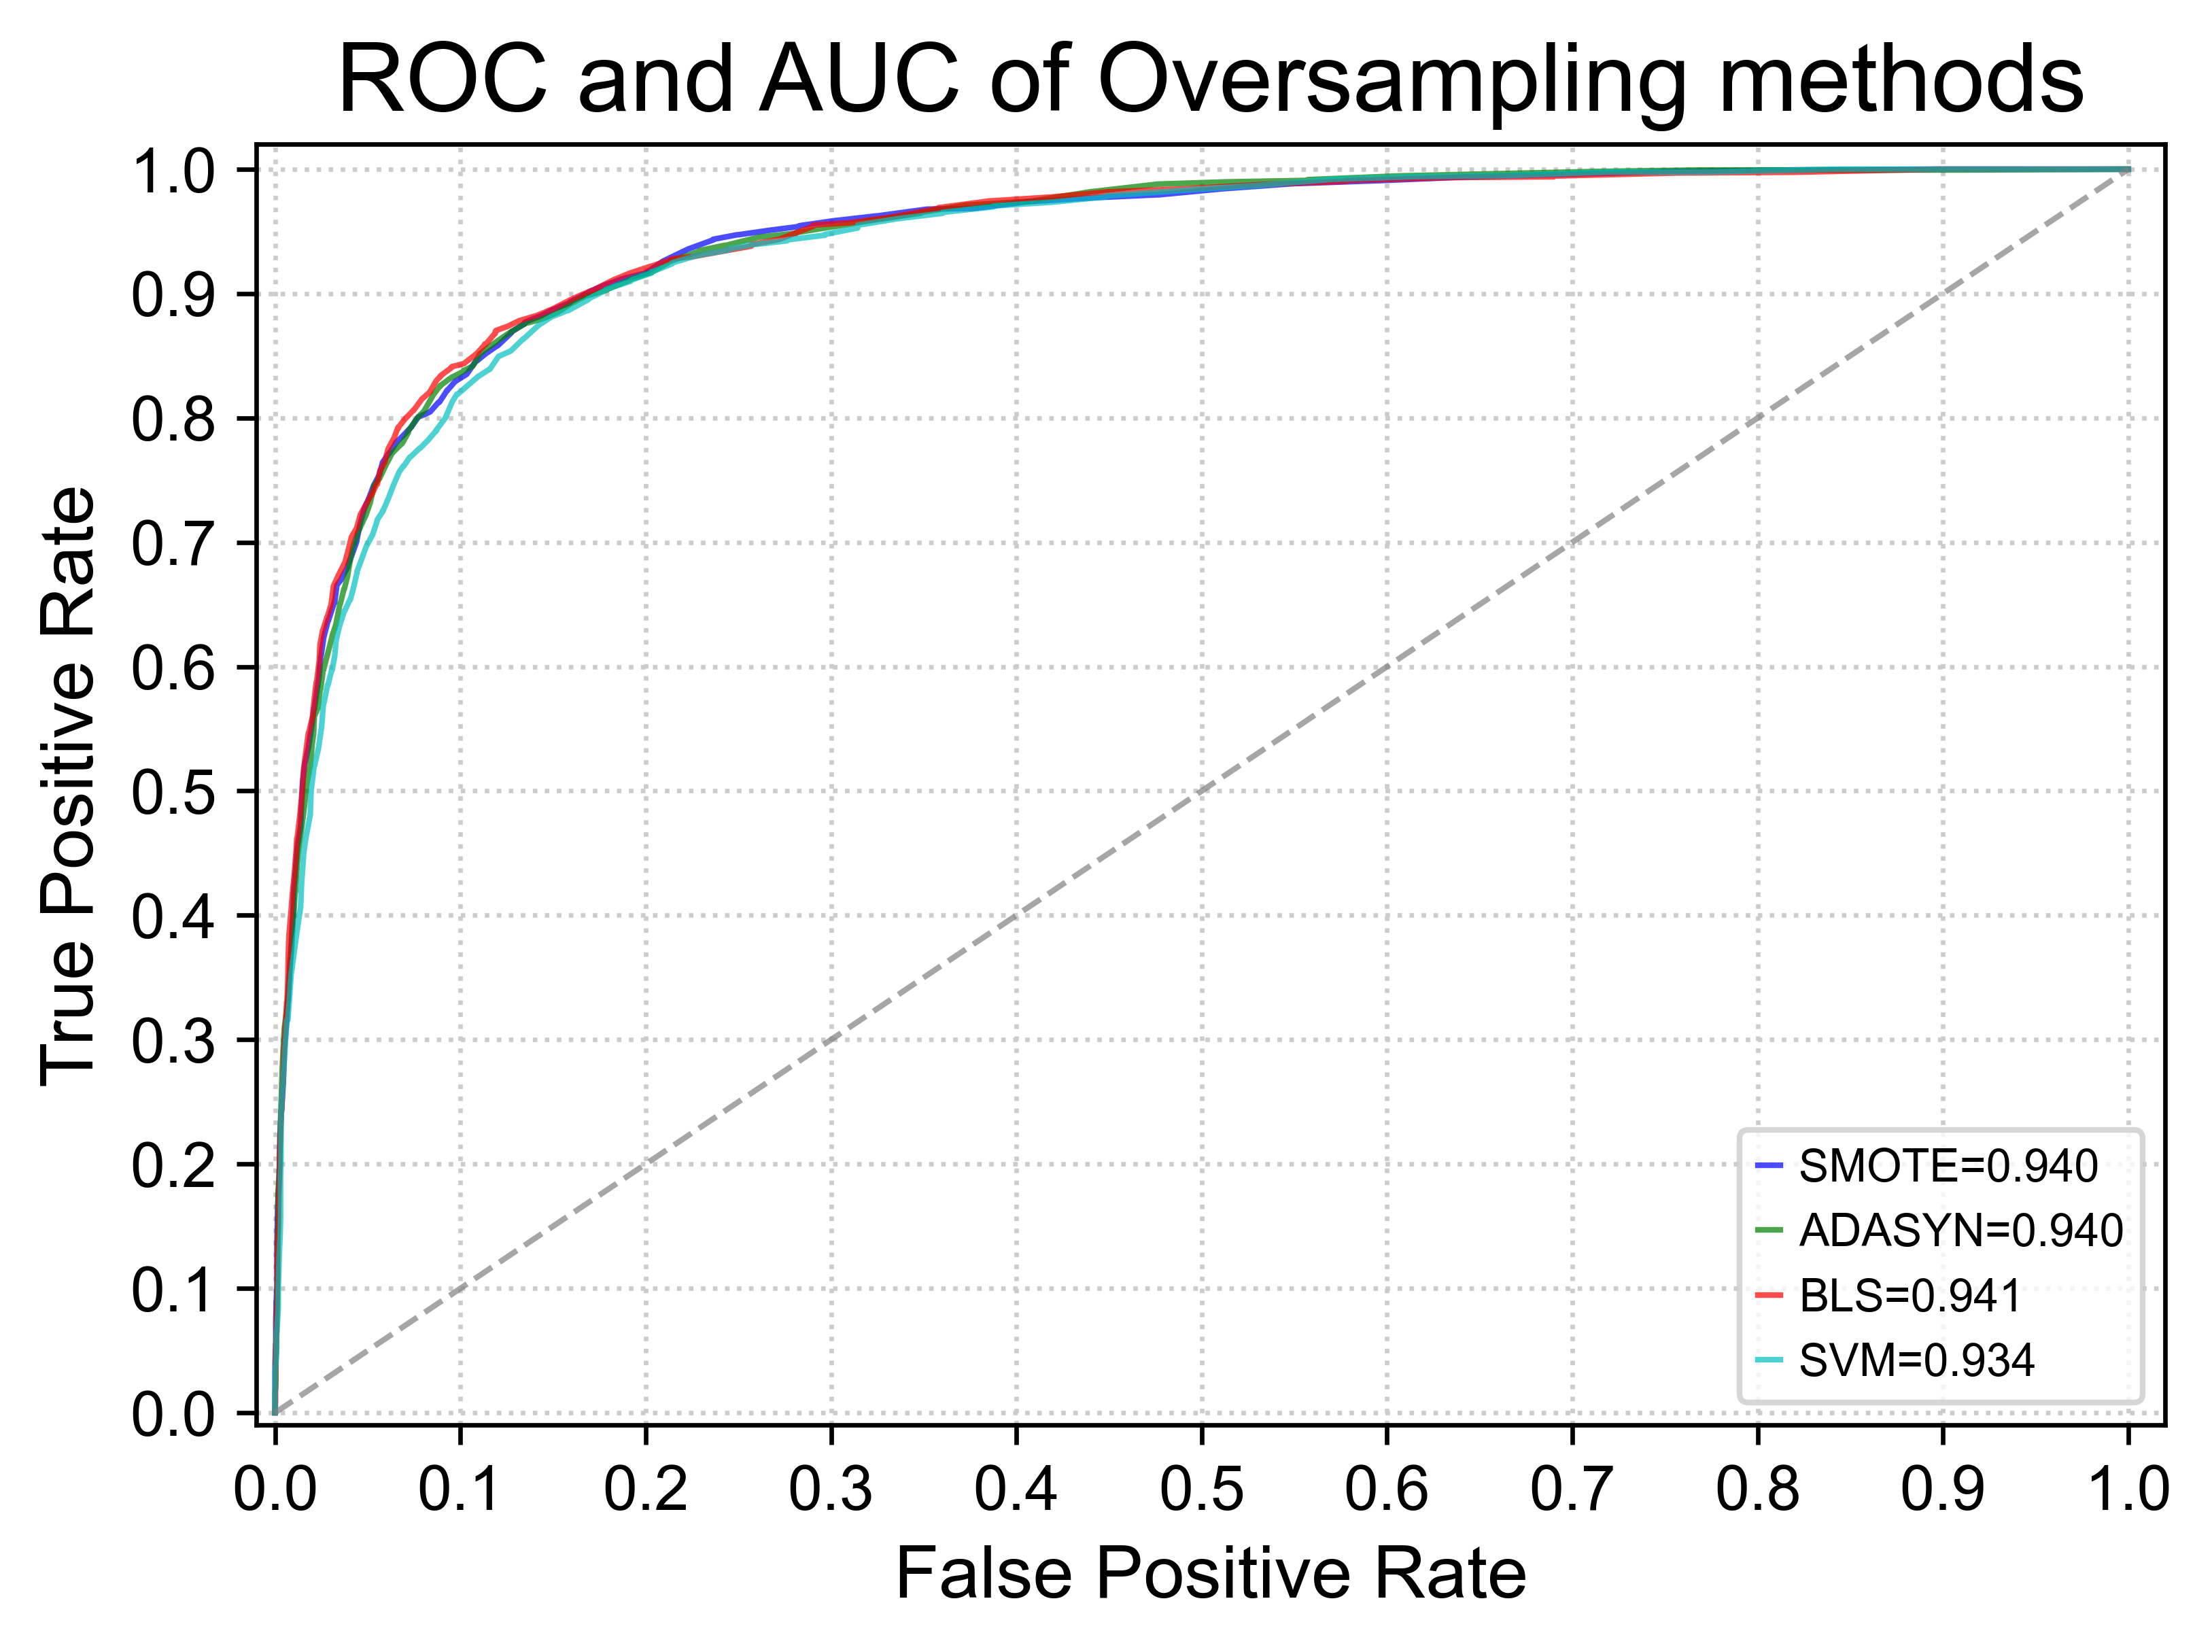

In [4]:
test_oversample(X)

Raw target type ratio:


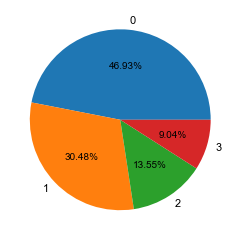

NearMiss balance score is  0.6478639240506329
              precision    recall  f1-score   support

           0       0.57      0.61      0.59        80
           1       0.72      0.66      0.69        79
           2       0.74      0.66      0.70        79
           3       0.59      0.66      0.62        80

    accuracy                           0.65       318
   macro avg       0.66      0.65      0.65       318
weighted avg       0.66      0.65      0.65       318

RUS balance score is  0.647507911392405
              precision    recall  f1-score   support

           0       0.63      0.59      0.61        80
           1       0.74      0.58      0.65        79
           2       0.73      0.62      0.67        79
           3       0.56      0.80      0.66        80

    accuracy                           0.65       318
   macro avg       0.67      0.65      0.65       318
weighted avg       0.66      0.65      0.65       318

RENN balance score is  0.4664903846153846
  

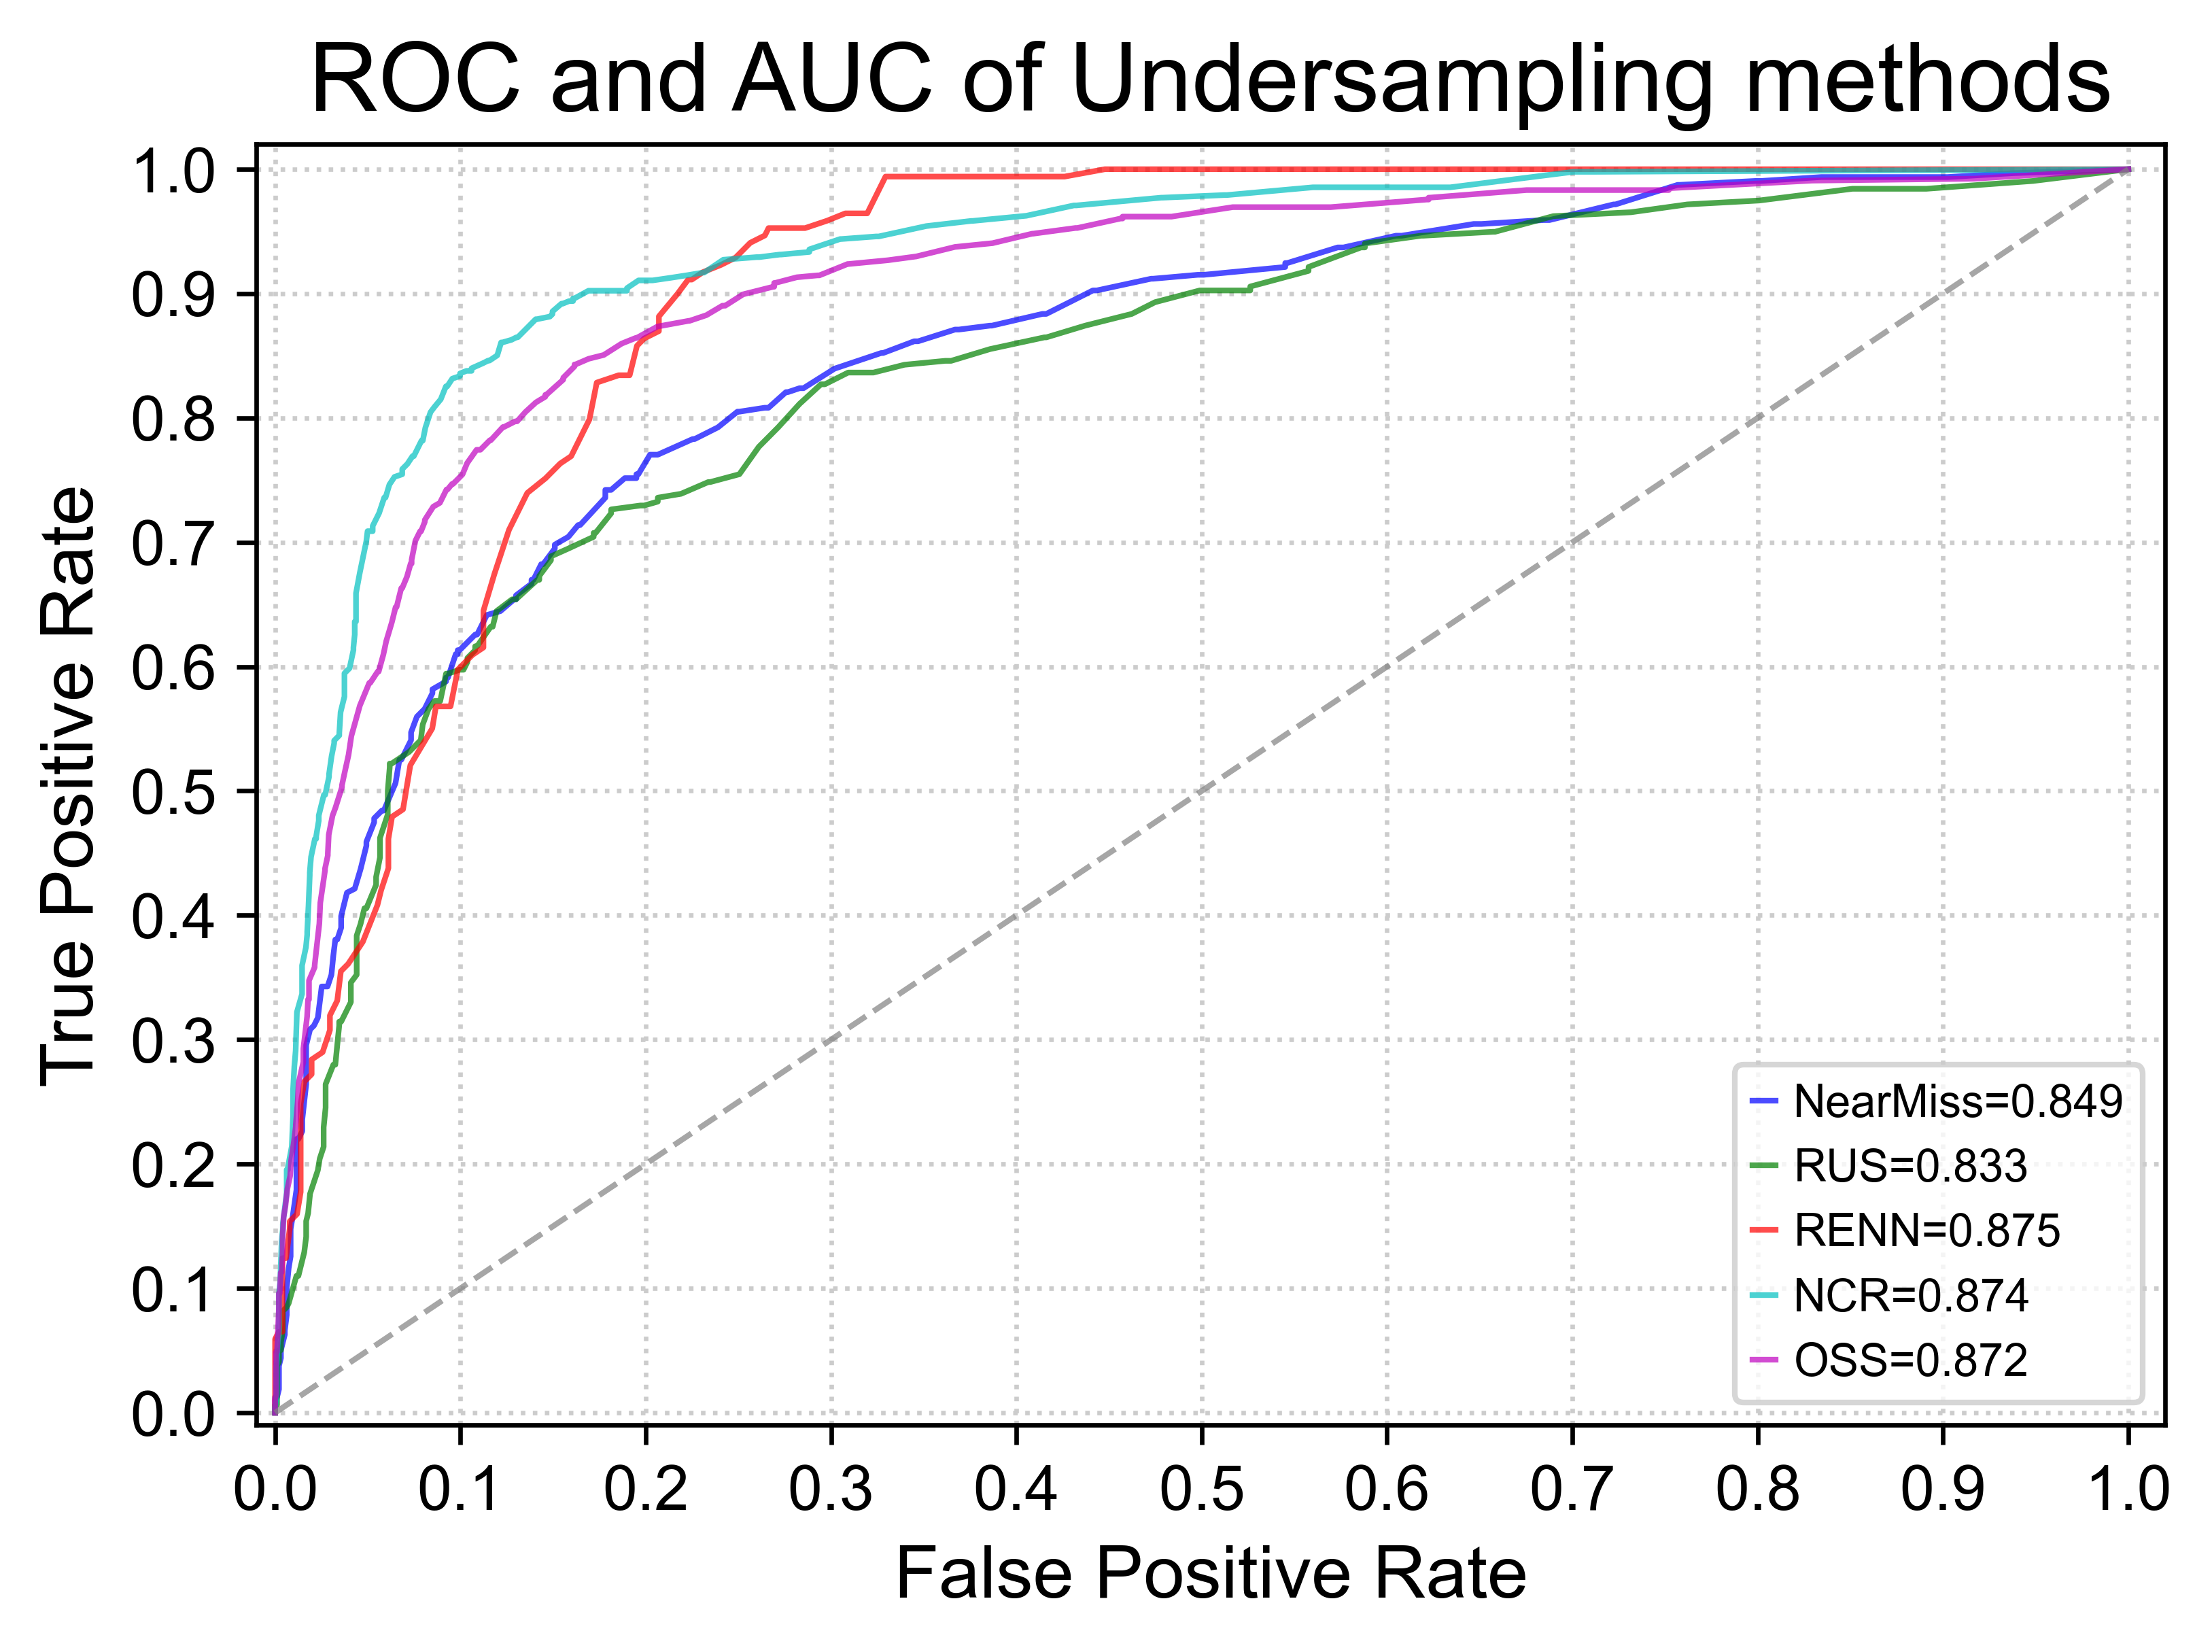

In [5]:
test_undersample(X)

Raw target type ratio:


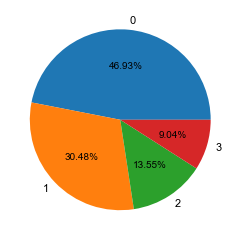

SMOTETomek balance score is  0.8100762575672089
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       355
           1       0.80      0.66      0.73       369
           2       0.87      0.80      0.83       382
           3       0.81      0.91      0.86       380

    accuracy                           0.81      1486
   macro avg       0.81      0.81      0.81      1486
weighted avg       0.81      0.81      0.81      1486

SMOTEENN balance score is  0.6876289881749219
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        24
           1       0.80      0.81      0.80        83
           2       0.93      0.91      0.92       192
           3       0.85      0.95      0.90       216

    accuracy                           0.87       515
   macro avg       0.89      0.69      0.69       515
weighted avg       0.88      0.87      0.86       515



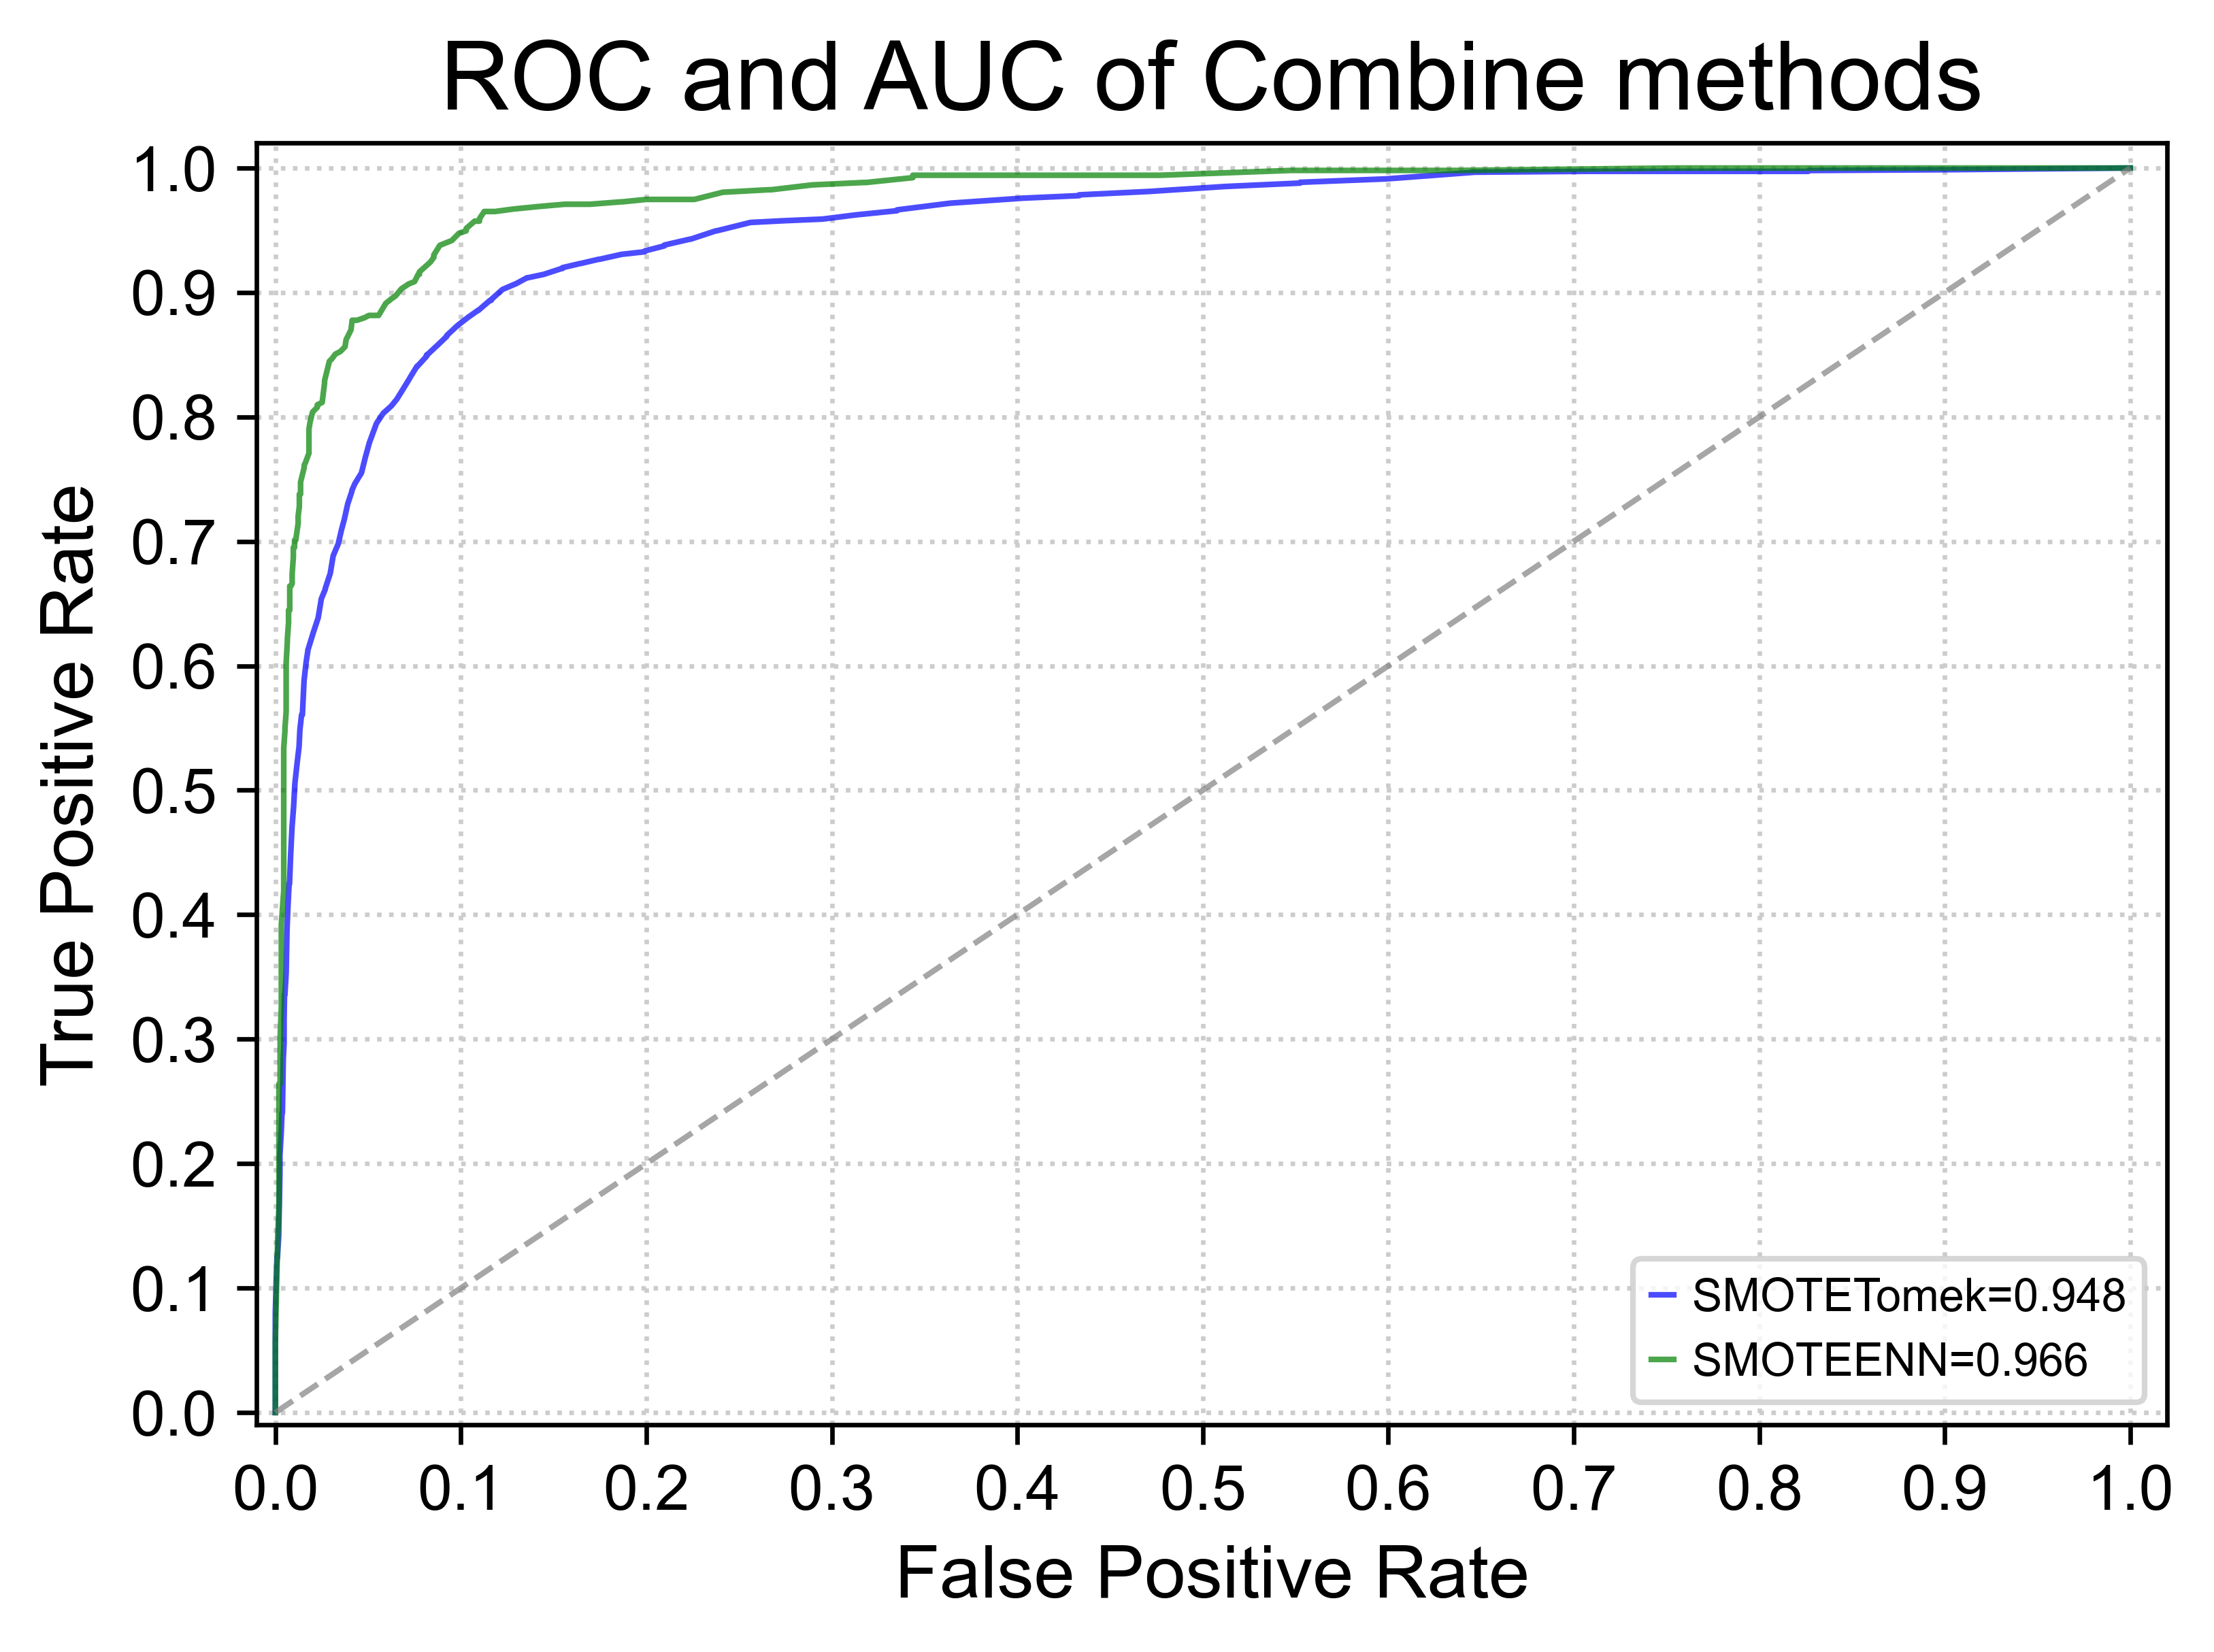

In [6]:
test_combine(X)

Raw target type ratio:


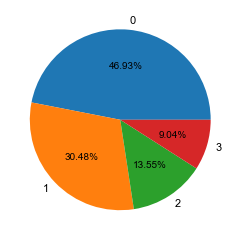

After imbalance processing type ratio:


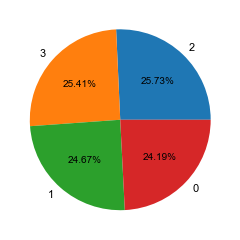

KNN balance score is  0.7337022976694979
              precision    recall  f1-score   support

           0       0.81      0.49      0.61       369
           1       0.82      0.62      0.71       377
           2       0.78      0.87      0.82       393
           3       0.64      0.96      0.77       388

    accuracy                           0.74      1527
   macro avg       0.76      0.73      0.73      1527
weighted avg       0.76      0.74      0.73      1527

GNB balance score is  0.4899633558357206
              precision    recall  f1-score   support

           0       0.48      0.45      0.47       369
           1       0.64      0.27      0.38       377
           2       0.43      0.81      0.56       393
           3       0.58      0.43      0.49       388

    accuracy                           0.49      1527
   macro avg       0.53      0.49      0.48      1527
weighted avg       0.53      0.49      0.48      1527

RF balance score is  0.812697054999708
         

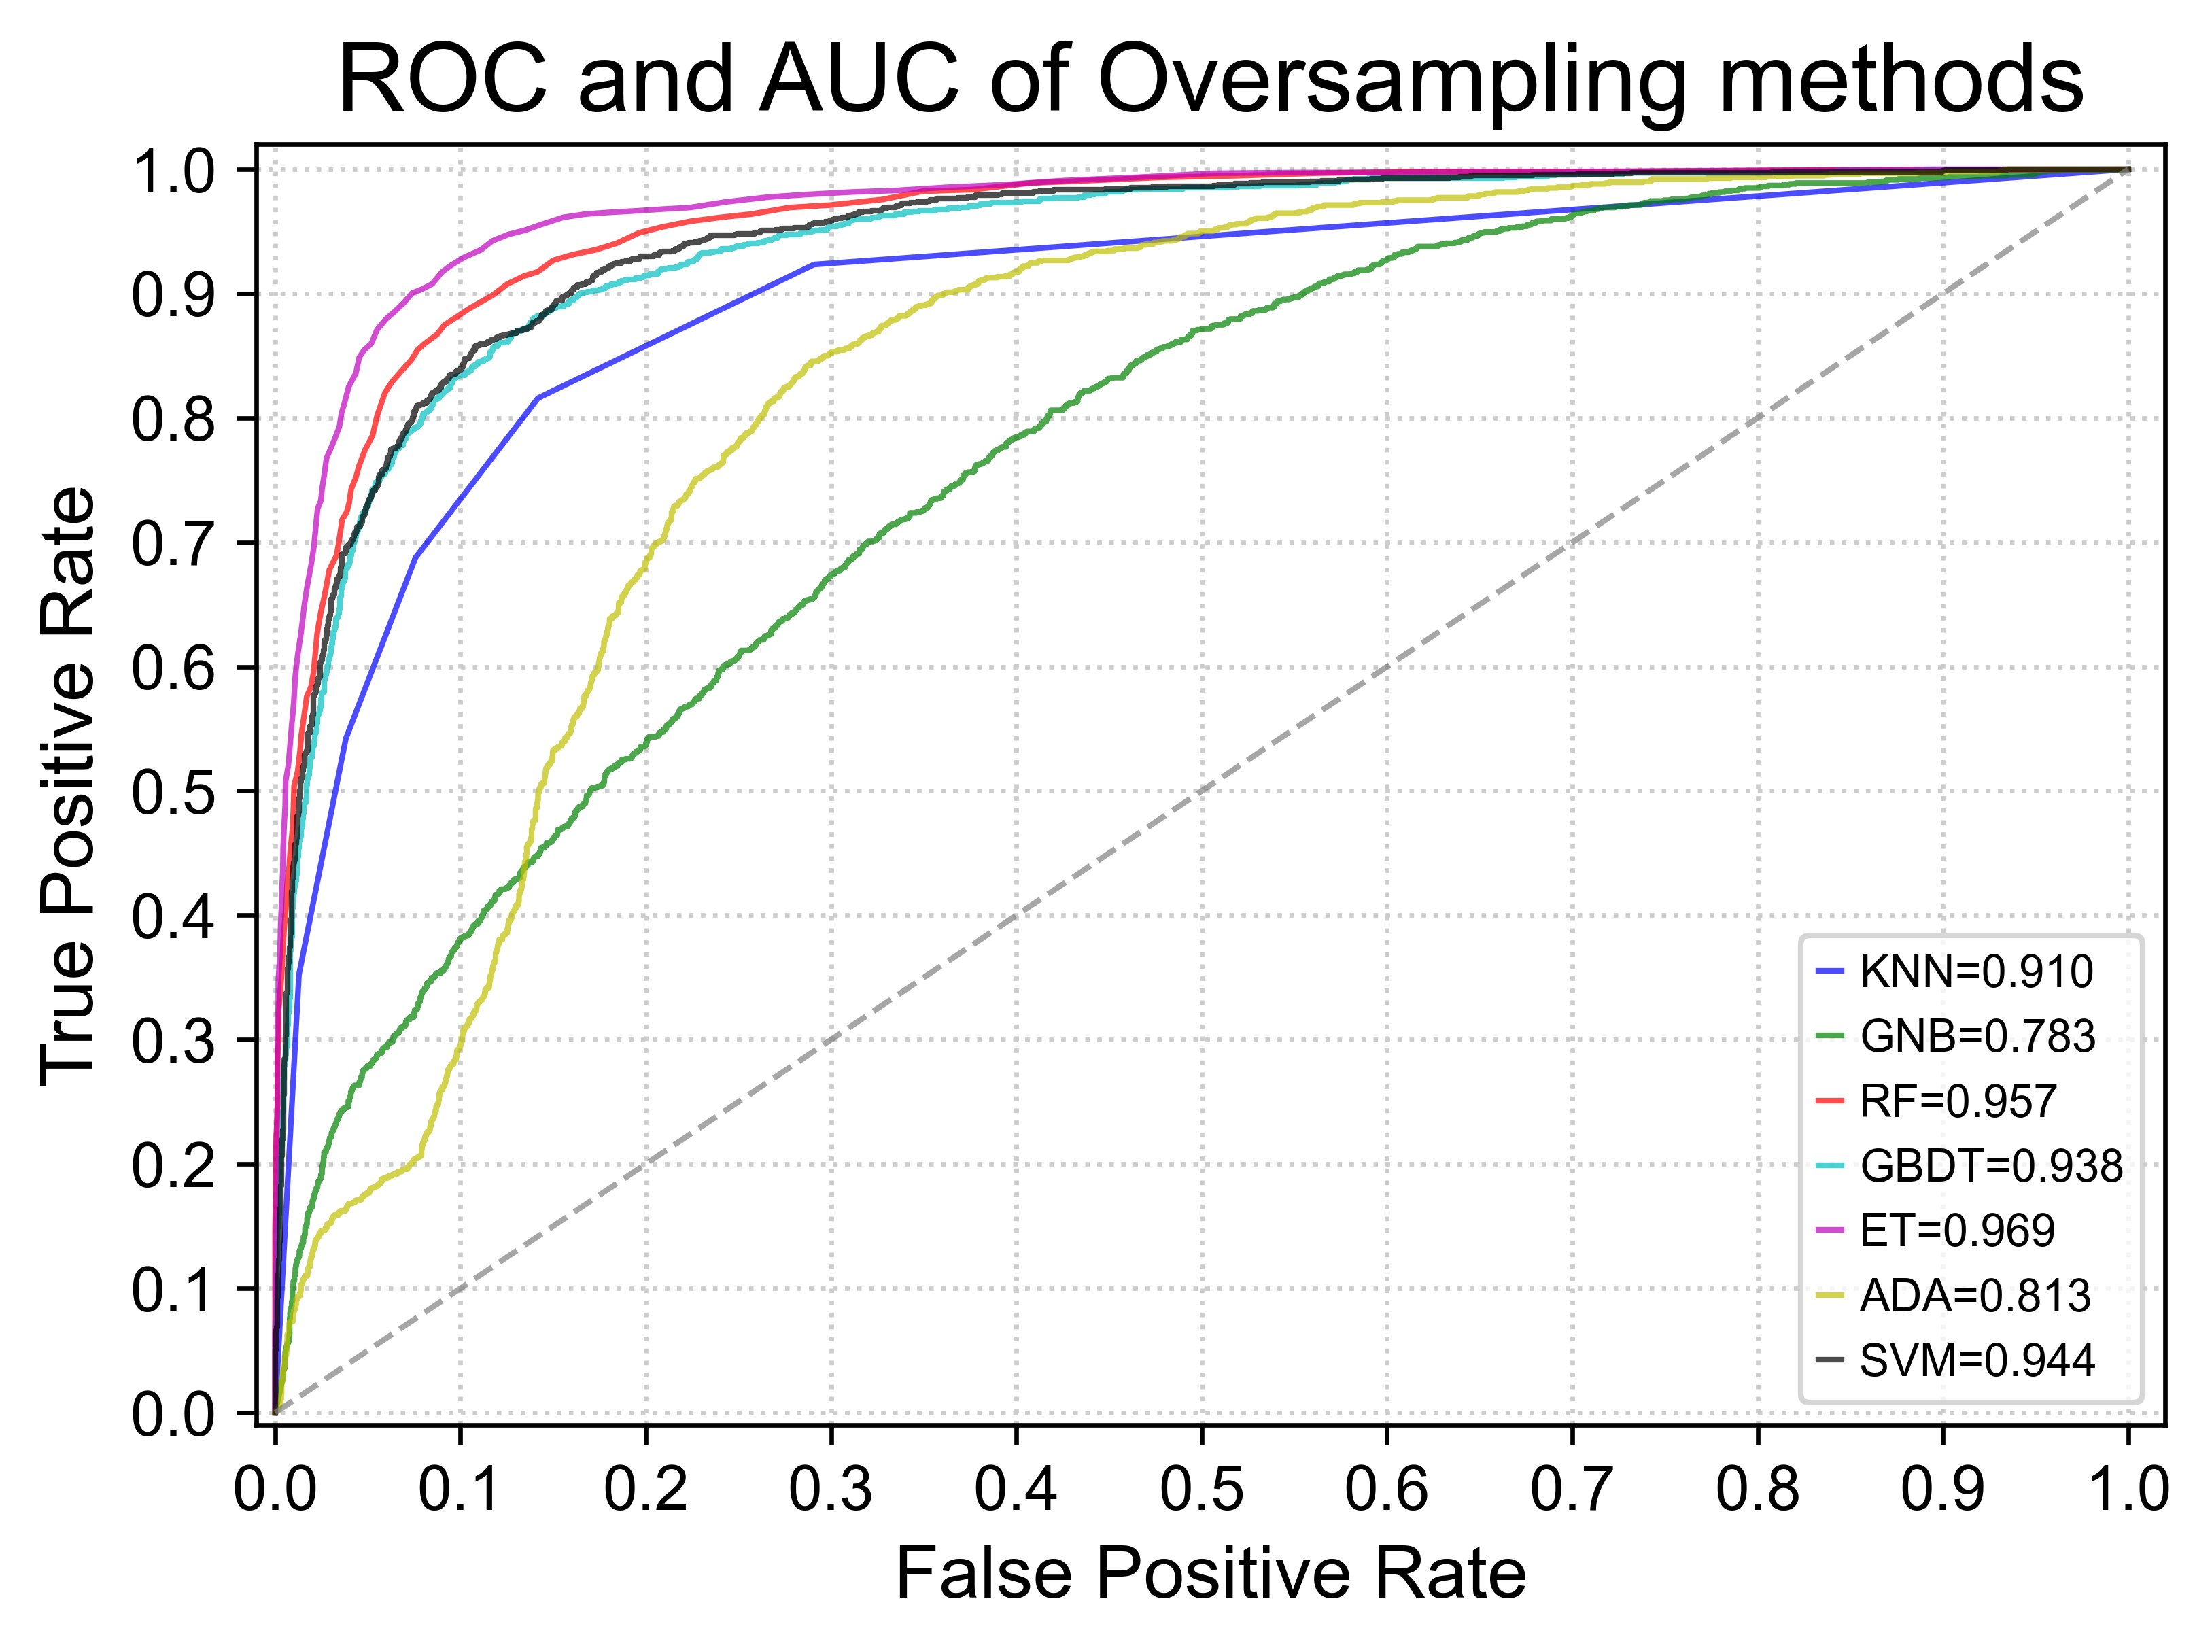

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.ensemble import ExtraTreesClassifier as ET
from sklearn.ensemble import AdaBoostClassifier as ADA
from sklearn.svm import SVC
def test_base(X, num_class=4):
    # Extract the labels for training
    labels = X['target']
    target_names = [str(i) for i in range(num_class)]
    # Remove the target
    X = X.drop(columns=['target'])
    
    print("Raw target type ratio:")
    plot_fraction(labels, num_class=num_class)
    sample_solver = SMOTETomek()
    X, labels = sample_solver.fit_sample(X, labels)
    print("After imbalance processing type ratio:")
    plot_fraction(labels, num_class=num_class)

    colorlist = ["b", "g", "r", "c", "m", "y", "k"]
    modelist = ["KNN", "GNB", "RF", "GBDT","ET", "ADA", "SVM"]
    X_train, X_test, y_train, y_test = train_test_split(X, labels, stratify=labels, test_size=0.3, random_state=326)
    X_train = X_train.drop(columns=["ID"])
    # Extract the ids
    test_ids = X_test['ID']
    X_test = X_test.drop(columns=['ID'])

    # Extract feature names
    feature_names = list(X_train.columns)
    plt.figure(dpi=600)
    
    for i in range(len(modelist)):
        model_name = modelist[i]
        if model_name == "KNN": 
            model = KNeighborsClassifier()
        elif model_name == "GNB":
            model = GaussianNB()
        elif model_name == "RF":
            model = RandomForestClassifier(random_state=0)
        elif model_name == "GBDT":
            model = GBDT(random_state=0)
        elif model_name == "ET":
            model = ET(random_state = 0)
        elif model_name == "ADA":
            model = ADA(random_state=0)
        elif model_name == "SVM":
            model = SVC(random_state=0,probability=True,kernel="rbf")
        
        # 原始是黑色
        model.fit(X_train, y_train)
        test_predictions = model.predict_proba(X_test)
        plot_auc_temp(y_test, test_predictions, num_class, name=model_name, c=colorlist[i])
        test_predictions = get_result(test_predictions)
        print(model_name+ " balance score is ", balanced_accuracy_score(y_test, test_predictions))

        test_real = pd.DataFrame({'ID': test_ids, 'real_class': y_test})
        test_predict = pd.DataFrame({'ID': test_ids, 'predict_class': test_predictions})
        print(classification_report(list(test_real["real_class"]), list(test_predict["predict_class"]),
                                    target_names=target_names))
        gc.enable()
        del model
        gc.collect()

    plt.plot((0, 1), (0, 1), c='#808080', lw=1, ls='--', alpha=0.7)
    plt.xlim((-0.01, 1.02))
    plt.ylim((-0.01, 1.02))
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.grid(b=True, ls=':')
    plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=8)
    plt.title('ROC and AUC of Oversampling methods', fontsize=17)
    plt.show()
    return
test_base(X)

## pipeline use

In [5]:
from package.preprocess import load_data
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split

X = F
#= load_data.read_data(dataset="dentategyrus", use_gene_list=True)
labels = X['target']

# Remove the target
X = X.drop(columns=['ID','target'])
pl_random_forest = Pipeline(steps=[('random_forest', RandomForestClassifier())])

scores = cross_val_score(pl_random_forest, X, labels, cv=10,scoring='accuracy')
print('Accuracy for RandomForest : ', scores.mean())

<function read_data at 0x7f7fa3329b70> Running time: 1.0126359462738037 Seconds
Accuracy for RandomForest :  0.6641638225255974


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pl_log_reg = Pipeline(steps=[('scaler',StandardScaler()),
 ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])
scores = cross_val_score(pl_log_reg, X, labels, cv=10,scoring='accuracy')
print('Accuracy for Logistic Regression: ', scores.mean())

Accuracy for Logistic Regression:  0.615358361774744


In [9]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
pca = PCA(n_components = 20)
pca_vectors = pca.fit_transform(scaled_df)
for index, var in enumerate(pca.explained_variance_ratio_):
    print("Explained Variance ratio by Principal Component ", (index+1), " : ", var)

Explained Variance ratio by Principal Component  1  :  0.08298991278930716
Explained Variance ratio by Principal Component  2  :  0.06792928449595327
Explained Variance ratio by Principal Component  3  :  0.04555661955884114
Explained Variance ratio by Principal Component  4  :  0.023825219215054996
Explained Variance ratio by Principal Component  5  :  0.023415548247688562
Explained Variance ratio by Principal Component  6  :  0.021575004029988656
Explained Variance ratio by Principal Component  7  :  0.019531295786154697
Explained Variance ratio by Principal Component  8  :  0.01907989840548979
Explained Variance ratio by Principal Component  9  :  0.017878762562298776
Explained Variance ratio by Principal Component  10  :  0.01734745332271118
Explained Variance ratio by Principal Component  11  :  0.01721378613772262
Explained Variance ratio by Principal Component  12  :  0.017067600940986288
Explained Variance ratio by Principal Component  13  :  0.016932066022035532
Explained Vari

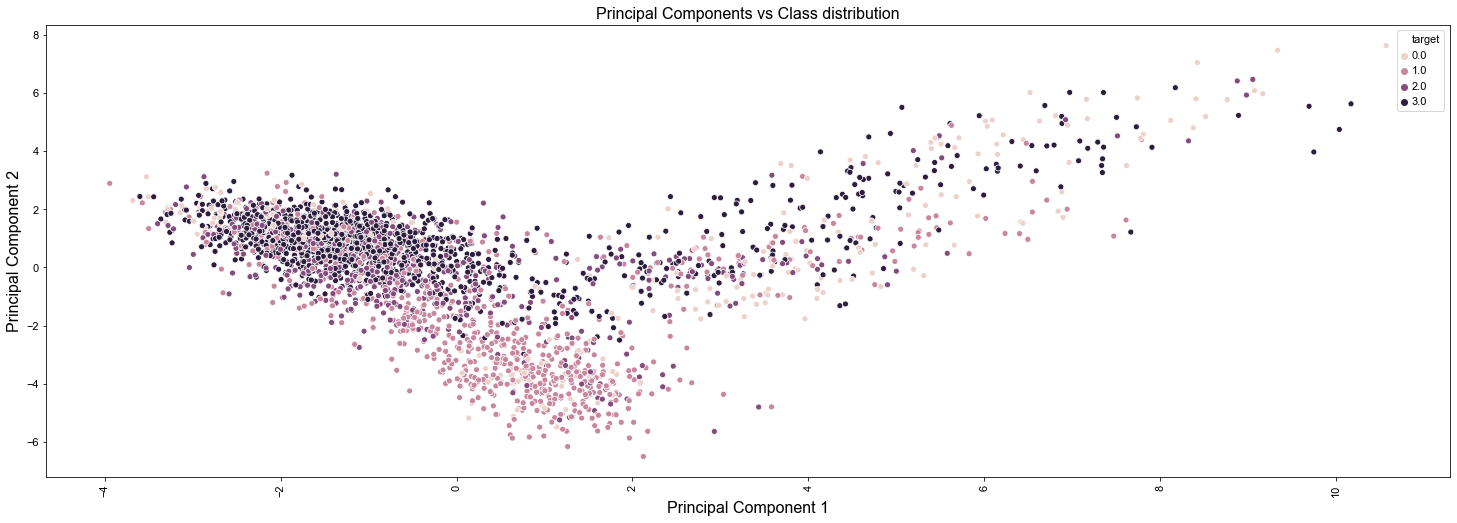

In [10]:
plt.figure(figsize=(25,8))
sns.scatterplot(x=pca_vectors[:, 0], y=pca_vectors[:, 1], hue=labels)
plt.title('Principal Components vs Class distribution', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=16)
plt.xticks(rotation='vertical');

In [11]:
pl_log_reg_pca = Pipeline(steps=[('scaler',StandardScaler()),
 ('pca', PCA(n_components = 2)),
 ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])
scores = cross_val_score(pl_log_reg_pca, X, labels, cv=10,scoring='accuracy')
print('Accuracy for Logistic Regression with 2 Principal Components: ', scores.mean())

Accuracy for Logistic Regression with 2 Principal Components:  0.5757679180887373


In [12]:
pl_log_reg_pca = Pipeline(steps=[('scaler',StandardScaler()),
 ('pca', PCA(n_components = 10)),
 ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])
scores = cross_val_score(pl_log_reg_pca, X, labels, cv=10,scoring='accuracy')
print('Accuracy for Logistic Regression with 2 Principal Components: ', scores.mean())

Accuracy for Logistic Regression with 2 Principal Components:  0.5979522184300341


In [13]:
pl_log_reg_pca = Pipeline(steps=[('scaler',StandardScaler()),
 ('pca', PCA(n_components = 20)),
 ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])
scores = cross_val_score(pl_log_reg_pca, X, labels, cv=10,scoring='accuracy')
print('Accuracy for Logistic Regression with 2 Principal Components: ', scores.mean())

Accuracy for Logistic Regression with 2 Principal Components:  0.5996587030716723


In [15]:
from sklearn.neural_network import MLPClassifier
pl_mlp = Pipeline(steps=[('scaler',StandardScaler()),
 ('mlp_ann', MLPClassifier(hidden_layer_sizes=(32, 16)))])
scores = cross_val_score(pl_mlp, X, labels, cv=10,scoring='accuracy')
print('Accuracy for ANN : ', scores.mean())

Accuracy for ANN :  0.5600682593856655


In [16]:
from sklearn.svm import LinearSVC
pl_svm = Pipeline(steps=[('scaler',StandardScaler()),
 ('pl_svm', LinearSVC())])
scores = cross_val_score(pl_svm, X, labels, cv=10,scoring='accuracy')
print('Accuracy for Linear SVM : ', scores.mean())

Accuracy for Linear SVM :  0.6197952218430034


In [18]:
import xgboost as xgb
pl_xgb = Pipeline(steps=
 [('xgboost', xgb.XGBClassifier(objective='multi:softmax'))])
scores = cross_val_score(pl_xgb, X, labels, cv=10)
print('Accuracy for XGBoost Classifier : ', scores.mean())

Accuracy for XGBoost Classifier :  0.6648464163822526


# Model

## XGBC

<function read_data at 0x7fed72b930d0> Running time: 0.7219440937042236 Seconds
Raw target type ratio:


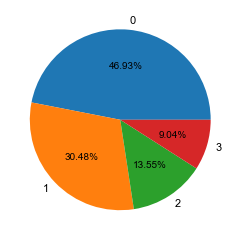

After imbalance processing type ratio:


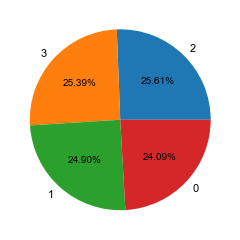

Training Data Shape:  (3553, 63)
Testing Data Shape:  (1523, 63)
=====================fold_0=====================
[0]	validation_0-mlogloss:1.35697	validation_1-mlogloss:1.36183
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 300 rounds.
[100]	validation_0-mlogloss:0.38418	validation_1-mlogloss:0.62727
[200]	validation_0-mlogloss:0.20887	validation_1-mlogloss:0.52643
[300]	validation_0-mlogloss:0.14115	validation_1-mlogloss:0.49355
[400]	validation_0-mlogloss:0.10742	validation_1-mlogloss:0.47897
[500]	validation_0-mlogloss:0.08722	validation_1-mlogloss:0.47176
[600]	validation_0-mlogloss:0.07394	validation_1-mlogloss:0.46872
[700]	validation_0-mlogloss:0.06470	validation_1-mlogloss:0.46774
[800]	validation_0-mlogloss:0.05778	validation_1-mlogloss:0.46681
[900]	validation_0-mlogloss:0.05247	validation_1-mlogloss:0.46688
[1000]	validation_0-mlogloss:0.04837	validation_1-mlogloss:0

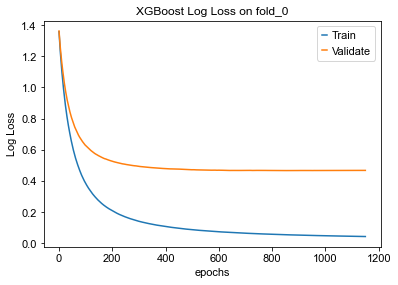

=====================fold_1=====================
[0]	validation_0-mlogloss:1.35579	validation_1-mlogloss:1.36249
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 300 rounds.
[100]	validation_0-mlogloss:0.38222	validation_1-mlogloss:0.63773
[200]	validation_0-mlogloss:0.20545	validation_1-mlogloss:0.54281
[300]	validation_0-mlogloss:0.13822	validation_1-mlogloss:0.51584
[400]	validation_0-mlogloss:0.10505	validation_1-mlogloss:0.50563
[500]	validation_0-mlogloss:0.08518	validation_1-mlogloss:0.50142
[600]	validation_0-mlogloss:0.07227	validation_1-mlogloss:0.50102
[700]	validation_0-mlogloss:0.06316	validation_1-mlogloss:0.50015
[800]	validation_0-mlogloss:0.05644	validation_1-mlogloss:0.50133
[900]	validation_0-mlogloss:0.05129	validation_1-mlogloss:0.50313
Stopping. Best iteration:
[662]	validation_0-mlogloss:0.06627	validation_1-mlogloss:0.49966



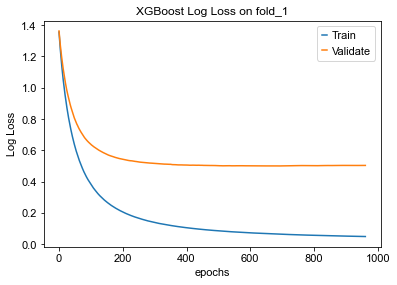

=====================fold_2=====================
[0]	validation_0-mlogloss:1.35664	validation_1-mlogloss:1.36079
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 300 rounds.
[100]	validation_0-mlogloss:0.38406	validation_1-mlogloss:0.63553
[200]	validation_0-mlogloss:0.20740	validation_1-mlogloss:0.53314
[300]	validation_0-mlogloss:0.14034	validation_1-mlogloss:0.50061
[400]	validation_0-mlogloss:0.10636	validation_1-mlogloss:0.48658
[500]	validation_0-mlogloss:0.08597	validation_1-mlogloss:0.47860
[600]	validation_0-mlogloss:0.07271	validation_1-mlogloss:0.47496
[700]	validation_0-mlogloss:0.06361	validation_1-mlogloss:0.47267
[800]	validation_0-mlogloss:0.05686	validation_1-mlogloss:0.47327
[900]	validation_0-mlogloss:0.05160	validation_1-mlogloss:0.47339
[1000]	validation_0-mlogloss:0.04745	validation_1-mlogloss:0.47541
Stopping. Best iteration:
[785]	validation_0-mlogloss:0.05

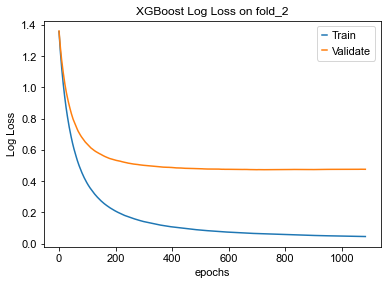

=====================fold_3=====================
[0]	validation_0-mlogloss:1.35602	validation_1-mlogloss:1.36060
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 300 rounds.
[100]	validation_0-mlogloss:0.38410	validation_1-mlogloss:0.63624
[200]	validation_0-mlogloss:0.20682	validation_1-mlogloss:0.53248
[300]	validation_0-mlogloss:0.13971	validation_1-mlogloss:0.49693
[400]	validation_0-mlogloss:0.10582	validation_1-mlogloss:0.48328
[500]	validation_0-mlogloss:0.08608	validation_1-mlogloss:0.47702
[600]	validation_0-mlogloss:0.07288	validation_1-mlogloss:0.47376
[700]	validation_0-mlogloss:0.06375	validation_1-mlogloss:0.47233
[800]	validation_0-mlogloss:0.05695	validation_1-mlogloss:0.47248
[900]	validation_0-mlogloss:0.05180	validation_1-mlogloss:0.47289
[1000]	validation_0-mlogloss:0.04774	validation_1-mlogloss:0.47315
Stopping. Best iteration:
[708]	validation_0-mlogloss:0.06

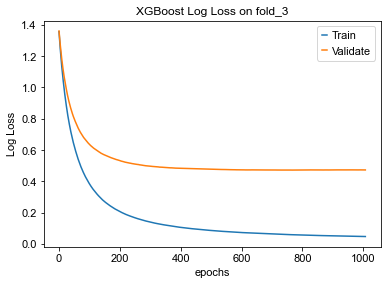

=====================fold_4=====================
[0]	validation_0-mlogloss:1.35529	validation_1-mlogloss:1.36156
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 300 rounds.
[100]	validation_0-mlogloss:0.38029	validation_1-mlogloss:0.65505
[200]	validation_0-mlogloss:0.20627	validation_1-mlogloss:0.57253
[300]	validation_0-mlogloss:0.14019	validation_1-mlogloss:0.55212
[400]	validation_0-mlogloss:0.10596	validation_1-mlogloss:0.54381
[500]	validation_0-mlogloss:0.08595	validation_1-mlogloss:0.54028
[600]	validation_0-mlogloss:0.07280	validation_1-mlogloss:0.53954
[700]	validation_0-mlogloss:0.06350	validation_1-mlogloss:0.54108
Stopping. Best iteration:
[479]	validation_0-mlogloss:0.08939	validation_1-mlogloss:0.53946



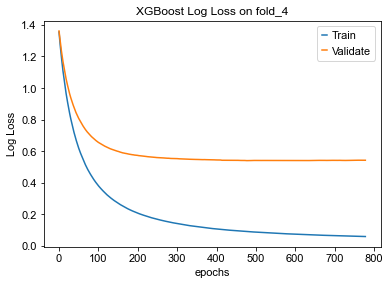

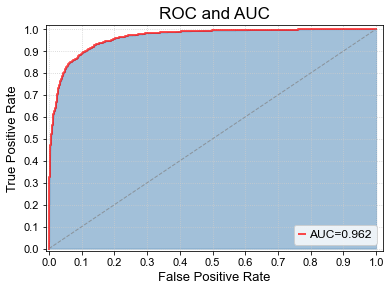

Xgboost balance score is  0.8289322986966976
<function model_XGBC at 0x7fed7420b0d0> Running time: 295.50893092155457 Seconds


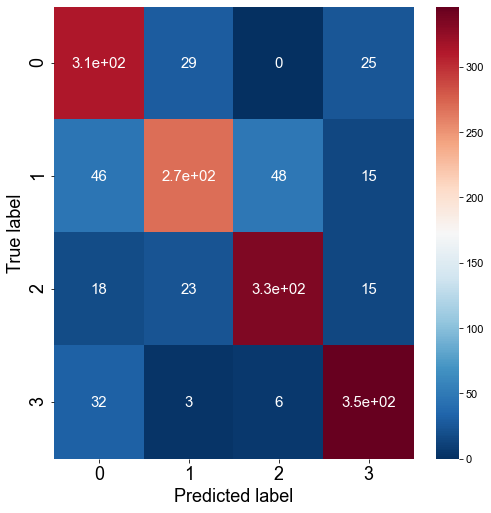

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       367
           1       0.83      0.71      0.77       379
           2       0.86      0.86      0.86       390
           3       0.86      0.89      0.88       387

    accuracy                           0.83      1523
   macro avg       0.83      0.83      0.83      1523
weighted avg       0.83      0.83      0.83      1523



In [10]:
X = read_data(dataset="dentategyrus", num_class=4, use_gene_list=True)
# test_real, test_predict = model_RF(X)
test_real, test_predict, feature_importances, valid = velo_xgb.model_XGBC(X, num_class = 4)
# test_real, test_predict = stacking_model(X, num_class=4)
eval_result(test_real, test_predict, 4)

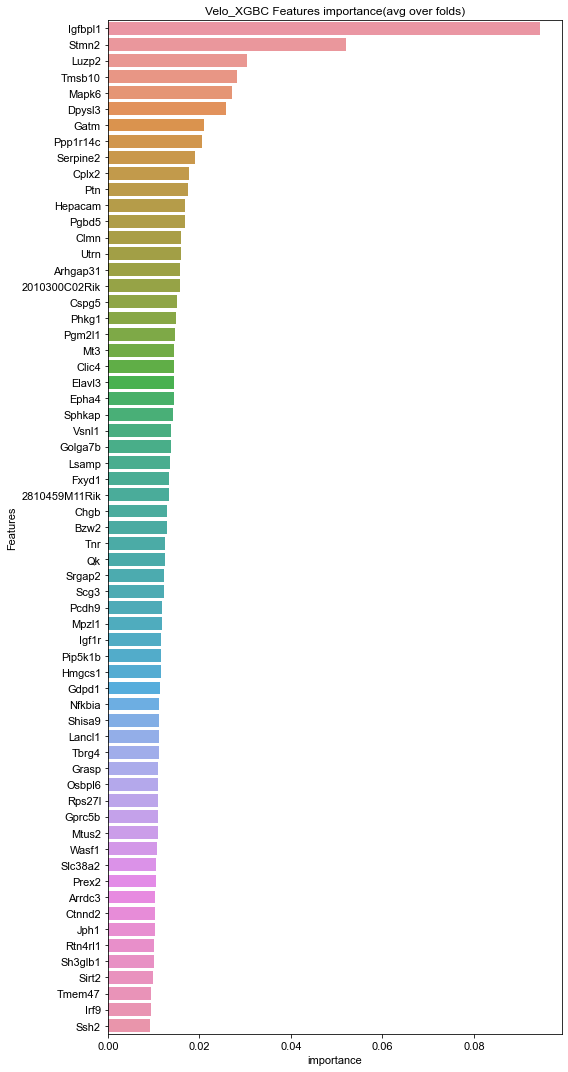

In [11]:
plot_fi(feature_importances)

## RF

Raw target type ratio:


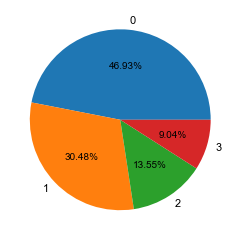

After imbalance processing type ratio:


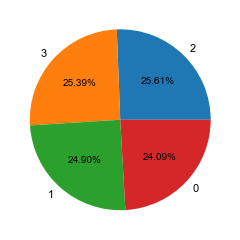

Training Data Shape:  (3553, 63)
Testing Data Shape:  (1523, 63)


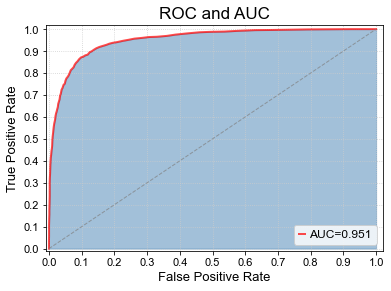

RF balance score is  0.8064553121641203


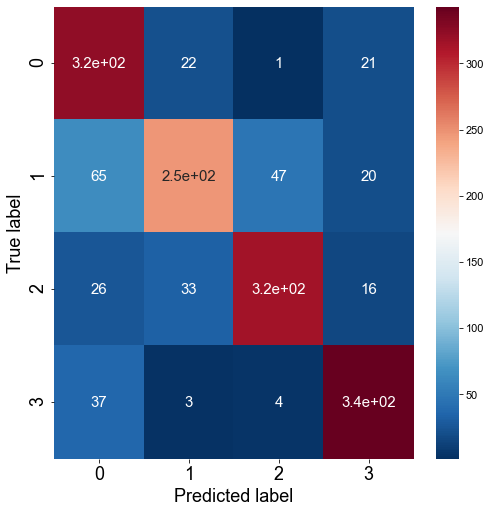

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       367
           1       0.81      0.65      0.72       379
           2       0.86      0.81      0.83       390
           3       0.86      0.89      0.87       387

    accuracy                           0.81      1523
   macro avg       0.81      0.81      0.80      1523
weighted avg       0.81      0.81      0.80      1523



In [12]:
test_real, test_predict = model_RF(X)
eval_result(test_real, test_predict, 4)

## Stacking

In [23]:
test_real, test_predict = stacking_model(X)
eval_result(test_real, test_predict, 4)

# hyper parms curve

In [68]:
data = pd.DataFrame(exp_ans_class, columns=['balance_score'])
data["num_class"] = num_class

In [69]:
data

balance_score  num_class
0        0.793147          4
1        0.769690          5
2        0.763021          6
3        0.812199          7
4        0.830103          8
5        0.800000          9
6        0.770000         10
7        0.750000         11
8        0.740000         12
9        0.720000         13
10       0.700000         14
11       0.710000         15
12       0.700000         16

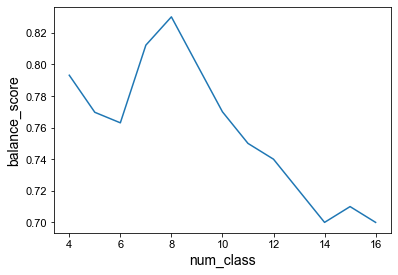

In [94]:
import seaborn as sns
sns.lineplot(x="num_class", y="balance_score", data=data)
plt.xlabel('num_class',fontsize=14)
plt.ylabel('balance_score',fontsize=14)
plt.show()

In [87]:
# exp_ansk_bef.extend(exp_ansk)
data1 = pd.DataFrame(exp_ansk, columns=['balance_score'])
data1["top_k"] = a
data1

balance_score  top_k
0        0.758002      3
1        0.753445      4
2        0.784501      5
3        0.776157      6
4        0.796642      7
5        0.811161      8
6        0.799438      9
7        0.808513     10
8        0.796200     11
9        0.799184     12
10       0.804804     13
11       0.817612     14
12       0.811982     15
13       0.836921     16
14       0.809697     17
15       0.822314     18
16       0.821099     19
17       0.815885     20
18       0.817902     21
19       0.818071     22
20       0.826084     23
21       0.821409     24
22       0.840011     25
23       0.831978     26
24       0.800451     27
25       0.830081     28
26       0.838141     29
27       0.837977     30
28       0.820000     31
29       0.810000     32
30       0.830000     33
31       0.810000     34
32       0.820000     35
33       0.810000     36
34       0.830000     37

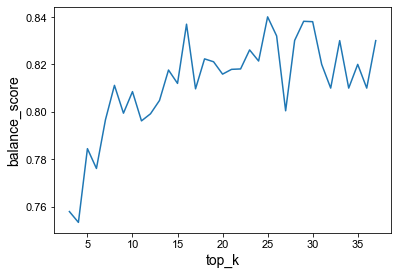

In [93]:
sns.lineplot(x="top_k", y="balance_score", data=data1)
plt.xlabel('top_k',fontsize=14)
plt.ylabel('balance_score',fontsize=14) 
plt.show()